In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# PDP 명점불량원인 도출 프로젝트

#### 기본 패키지

In [ ]:
# 행렬 연산 패키지
import numpy as np

# 데이터 구성 패키지 : series, dataframe
import pandas as pd

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 이용햔 그래프 실행 및 결과 확인
%matplotlib inline

In [ ]:
# 한글 폰트(나눔고딕) 적용
matplotlib.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumBarunGothic')

# seaborn에서 한글 깨짐 해결 : unicode minus 사용 않기 위한 설정
plt.rcParams['axes.unicode_minus'] = False

# Pandas 소수점 3자리
pd.options.display.precision = 3

# 최대 행 수 설정
pd.set_option('display.max_rows', 500)
# 최대 열 수 설정
pd.set_option('display.max_columns', 500)
# 표시할 가로의 길이
pd.set_option('display.width', 1000)

#### 회귀분석 패키지

In [ ]:
# 회귀분석
from statsmodels.formula.api import ols

from statsmodels.stats.anova import anova_lm

# qplot, 회귀분석 상수항 추가
from statsmodels.api import qqplot, add_constant

# 선형모델 formula
import statsmodels.formula.api as smf

# 평가함수
from statsmodels.tools.eval_measures import rmse

# 다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 선형회귀모형
from sklearn.linear_model import LinearRegression as lr

# 변수 선택법 (후진제거법)
from sklearn.feature_selection import RFE

# 로지스틱 회귀
from statsmodels.api import Logit

# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 트리기반 패키지

In [ ]:
# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기)
import graphviz

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split

# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR

# 예측/회귀 Random Forest
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import GradientBoostingRegressor as GBR

# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

#### 모델 평가 패키지

In [ ]:
# 모델 성능 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_curve, auc

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### 히스토그램, 교차분석표 함수

In [ ]:
def fun_plot_hist(data, var) :
    plt.hist(data[data['JUDGE'] == 0][var], label = '양품', alpha = 0.5)
    plt.hist(data[data['JUDGE'] == 1][var], label = '명점', alpha = 0.5)
    plt.legend()

In [ ]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data['JUDGE'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['JUDGE'],columns = data[var], normalize ='columns').round(3))

#### 구글 코랩 드라이브 설정

In [ ]:
# 구글코랩
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 전체 불량률 상황 확인

#### 일별 불량률

shape : (123, 4)


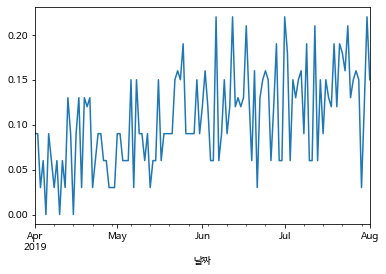

In [ ]:
from datetime import datetime

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_df_ratio_date.csv', sep='\t', engine='python', encoding='cp949', parse_dates=['날짜'])

print('shape :', df_raw.shape)

df_raw = df_raw.set_index('날짜')
df_raw = df_raw['불량률']
df_raw.plot()

#### 월별 불량률

4월 0.065
5월 0.098
6월 0.121
7월 0.141
8월 0.152


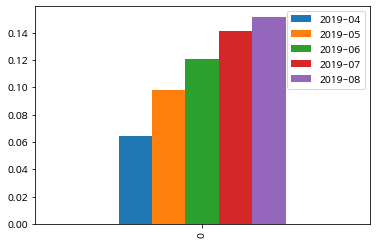

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_df_ratio_date.csv', sep='\t', engine='python', encoding='cp949', parse_dates=['날짜'])
df_raw = df_raw.set_index('날짜')

df_raw['전체'] = df_raw['명점'] + df_raw['양품']

d4 = df_raw['2019-04']['명점'].sum() / df_raw['2019-04']['전체'].sum().round(3)
d5 = df_raw['2019-05']['명점'].sum() / df_raw['2019-05']['전체'].sum().round(3)
d6 = df_raw['2019-06']['명점'].sum() / df_raw['2019-06']['전체'].sum().round(3)
d7 = df_raw['2019-07']['명점'].sum() / df_raw['2019-07']['전체'].sum().round(3)
d8 = df_raw['2019-08']['명점'].sum() / df_raw['2019-08']['전체'].sum().round(3)
df = {'2019-04' : [d4],
      '2019-05' : [d5],
      '2019-06' : [d6],
      '2019-07' : [d7],
      '2019-08' : [d8]}
df = pd.DataFrame(data=df)
df.plot.bar()
print('4월', d4.round(3))
print('5월', d5.round(3))
print('6월', d6.round(3))
print('7월', d7.round(3))
print('8월', d8.round(3))

#### LOT별 불량률

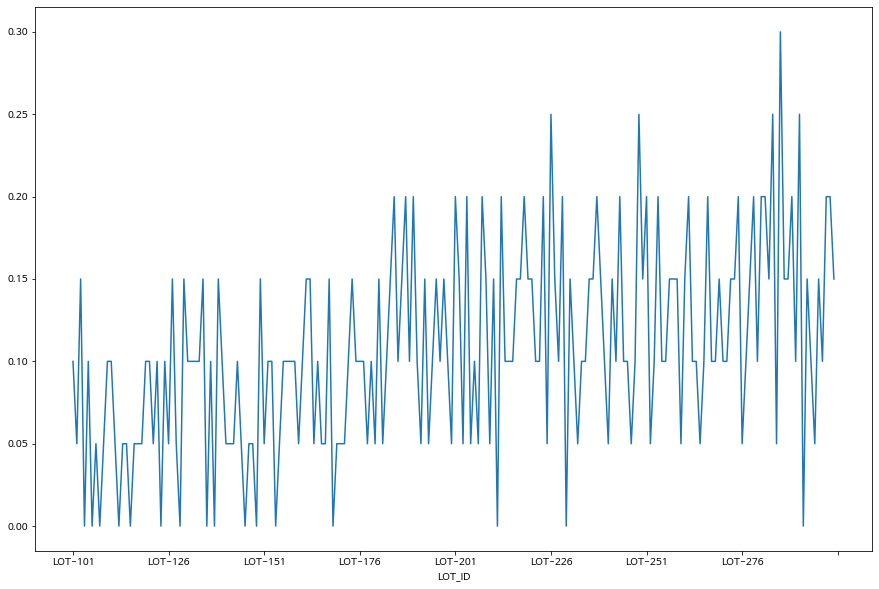

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_df_ratio_machine2.csv', engine='python', encoding='cp949')
df_raw = df_raw[['LOT_ID', '불량률']]

df_raw = df_raw.set_index('LOT_ID')
df_raw = df_raw['불량률']
df_raw.plot(figsize=(15, 10))

# Machine 설비 간의 유의차 분석 (VITAL FEW 도출)

### 불량 (panel 당)

#### 카이제곱

In [ ]:
# 카이제곱 패키지
from scipy import stats
from scipy.stats import chi2

# 크로스탭 함수
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data['JUDGE'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['JUDGE'],columns = data[var], normalize ='columns').round(3))

# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/MFG_MACHINE.csv', engine='python', encoding='cp949')
df_raw.head()

df_list = ['MC_1BLACK_1PRINT',
           'MC_1BLACK_2RTD',
           'MC_2AG_1PRINT',
           'MC_2AG_2RTD',
           'MC_2AG_3EXPOSURE',
           'MC_3BUS_1DEVELOP',
           'MC_3BUS_2FIRE',
           'MC_4DIELEC_1FIRE',
           'MC_5MGO',
           'MC_6PHOS_1R_1DISPENSER',
           'MC_6PHOS_1R_2DRY',
           'MC_6PHOS_2G_1DISPENSER',
           'MC_6PHOS_2G_2DRY',
           'MC_6PHOS_3B_1DISPENSER',
           'MC_6PHOS_4FIRE',
           'MC_7PASTE',
           'MC_8AGING'
           ]

for i in df_list :
  result = pd.crosstab(df_raw[i], df_raw['JUDGE'])
  chi, pval, dof, expected = stats.chi2_contingency(observed = result)
  print('%s의 카이제곱 결과' %i)
  print('%s 카이제곱 검정통계량 : %s' %(i, chi.round(3)))
  print('%s 카이제곱 검정 p : %s' %(i, pval.round(3)))
  print()

MC_1BLACK_1PRINT의 카이제곱 결과
MC_1BLACK_1PRINT 카이제곱 검정통계량 : 0.1
MC_1BLACK_1PRINT 카이제곱 검정 p : 0.752

MC_1BLACK_2RTD의 카이제곱 결과
MC_1BLACK_2RTD 카이제곱 검정통계량 : 0.408
MC_1BLACK_2RTD 카이제곱 검정 p : 0.523

MC_2AG_1PRINT의 카이제곱 결과
MC_2AG_1PRINT 카이제곱 검정통계량 : 0.157
MC_2AG_1PRINT 카이제곱 검정 p : 0.692

MC_2AG_2RTD의 카이제곱 결과
MC_2AG_2RTD 카이제곱 검정통계량 : 5.018
MC_2AG_2RTD 카이제곱 검정 p : 0.025

MC_2AG_3EXPOSURE의 카이제곱 결과
MC_2AG_3EXPOSURE 카이제곱 검정통계량 : 0.086
MC_2AG_3EXPOSURE 카이제곱 검정 p : 0.769

MC_3BUS_1DEVELOP의 카이제곱 결과
MC_3BUS_1DEVELOP 카이제곱 검정통계량 : 3.502
MC_3BUS_1DEVELOP 카이제곱 검정 p : 0.061

MC_3BUS_2FIRE의 카이제곱 결과
MC_3BUS_2FIRE 카이제곱 검정통계량 : 0.898
MC_3BUS_2FIRE 카이제곱 검정 p : 0.343

MC_4DIELEC_1FIRE의 카이제곱 결과
MC_4DIELEC_1FIRE 카이제곱 검정통계량 : 11.43
MC_4DIELEC_1FIRE 카이제곱 검정 p : 0.003

MC_5MGO의 카이제곱 결과
MC_5MGO 카이제곱 검정통계량 : 1.208
MC_5MGO 카이제곱 검정 p : 0.272

MC_6PHOS_1R_1DISPENSER의 카이제곱 결과
MC_6PHOS_1R_1DISPENSER 카이제곱 검정통계량 : 0.06
MC_6PHOS_1R_1DISPENSER 카이제곱 검정 p : 0.806

MC_6PHOS_1R_2DRY의 카이제곱 결과
MC_6PHOS_1R_2DRY 카이제곱 검정통계량 : 1.042
MC_6PHOS_

### 불량률 (LOT당)

In [ ]:
# 구글코랩
from google.colab import drive
drive.mount('/content/gdrive')

# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_df_ratio_machine2.csv', engine='python', encoding='cp949')

print('shape :', df_raw.shape)
df_raw.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
shape : (200, 21)


,LOT_ID,명점,양품,불량률,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,LOT-101,2,18,0.10,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,LOT-102,1,19,0.05,1호기,1호기,2호기,1호기,2호기,1호기,2호기,3호기,2호기,1호기,2호기,1호기,1호기,2호기,3호기,2호기,2호기
2,LOT-103,3,17,0.15,2호기,2호기,1호기,1호기,2호기,2호기,2호기,2호기,2호기,1호기,2호기,1호기,2호기,1호기,1호기,2호기,2호기
3,LOT-104,0,20,0.00,1호기,1호기,2호기,2호기,1호기,2호기,1호기,3호기,2호기,1호기,2호기,1호기,1호기,1호기,2호기,2호기,1호기
4,LOT-105,2,18,0.10,2호기,1호기,1호기,1호기,1호기,1호기,1호기,1호기,2호기,1호기,2호기,1호기,2호기,2호기,2호기,2호기,1호기


In [ ]:
df_raw.drop(['명점', '양품', 'LOT_ID'], axis=1, inplace=True)
df_raw.head()

,불량률,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,0.10,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,0.05,1호기,1호기,2호기,1호기,2호기,1호기,2호기,3호기,2호기,1호기,2호기,1호기,1호기,2호기,3호기,2호기,2호기
2,0.15,2호기,2호기,1호기,1호기,2호기,2호기,2호기,2호기,2호기,1호기,2호기,1호기,2호기,1호기,1호기,2호기,2호기
3,0.00,1호기,1호기,2호기,2호기,1호기,2호기,1호기,3호기,2호기,1호기,2호기,1호기,1호기,1호기,2호기,2호기,1호기
4,0.10,2호기,1호기,1호기,1호기,1호기,1호기,1호기,1호기,2호기,1호기,2호기,1호기,2호기,2호기,2호기,2호기,1호기


In [ ]:
df_raw_x = df_raw.drop(['불량률'], axis=1, inplace=False)
df_raw_y = df_raw['불량률']
df_raw_x.tail()

,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
195,2호기,1호기,2호기,1호기,2호기,2호기,2호기,3호기,1호기,2호기,1호기,2호기,1호기,2호기,3호기,1호기,1호기
196,1호기,2호기,1호기,2호기,2호기,1호기,2호기,3호기,1호기,1호기,1호기,1호기,2호기,1호기,2호기,2호기,1호기
197,2호기,2호기,2호기,2호기,1호기,2호기,2호기,2호기,1호기,2호기,2호기,2호기,2호기,1호기,3호기,2호기,1호기
198,1호기,1호기,2호기,2호기,2호기,1호기,2호기,1호기,2호기,1호기,1호기,1호기,1호기,1호기,2호기,1호기,2호기
199,2호기,1호기,1호기,1호기,1호기,2호기,1호기,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기


#### ANOVA

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_list = df_raw_x.columns.to_list()

for i in df_list :
  model = ols('불량률 ~ C(%s)'%i, df_raw).fit()
  print(anova_lm(model))
  print()

                        df     sum_sq    mean_sq      F  PR(>F)
C(MC_1BLACK_1PRINT)    1.0  6.449e-04  6.449e-04  0.173   0.678
Residual             198.0  7.377e-01  3.726e-03    NaN     NaN

                      df  sum_sq  mean_sq      F  PR(>F)
C(MC_1BLACK_2RTD)    1.0   0.002    0.002  0.611   0.435
Residual           198.0   0.736    0.004    NaN     NaN

                     df     sum_sq    mean_sq      F  PR(>F)
C(MC_2AG_1PRINT)    1.0  9.528e-04  9.528e-04  0.256   0.614
Residual          198.0  7.374e-01  3.724e-03    NaN     NaN

                   df  sum_sq  mean_sq      F  PR(>F)
C(MC_2AG_2RTD)    1.0   0.025    0.025  6.948   0.009
Residual        198.0   0.713    0.004    NaN     NaN

                        df     sum_sq    mean_sq      F  PR(>F)
C(MC_2AG_3EXPOSURE)    1.0  5.662e-04  5.662e-04  0.152   0.697
Residual             198.0  7.378e-01  3.726e-03    NaN     NaN

                        df  sum_sq  mean_sq      F  PR(>F)
C(MC_3BUS_1DEVELOP)    1.0   0.018  

#### 의사결정나무 DT

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeRegressor as DTR

df_raw_x_dummy = pd.get_dummies(df_raw_x)
v_feature_name = df_raw_x_dummy.columns

# 최종 모델
tree_final = DTR(
                 random_state=1234,
                 max_depth=4
                )
tree_final.fit(df_raw_x_dummy, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(df_raw_x_dummy, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.308


,Feature,Importance
16,MC_4DIELEC_1FIRE_3호기,0.195
29,MC_6PHOS_4FIRE_1호기,0.126
21,MC_6PHOS_1R_2DRY_1호기,0.111
11,MC_3BUS_1DEVELOP_2호기,0.085
7,MC_2AG_2RTD_2호기,0.079
18,MC_5MGO_2호기,0.070
19,MC_6PHOS_1R_1DISPENSER_1호기,0.066
33,MC_7PASTE_2호기,0.056
0,MC_1BLACK_1PRINT_1호기,0.054
26,MC_6PHOS_2G_2DRY_2호기,0.047


Text(0, 0.5, '변수')

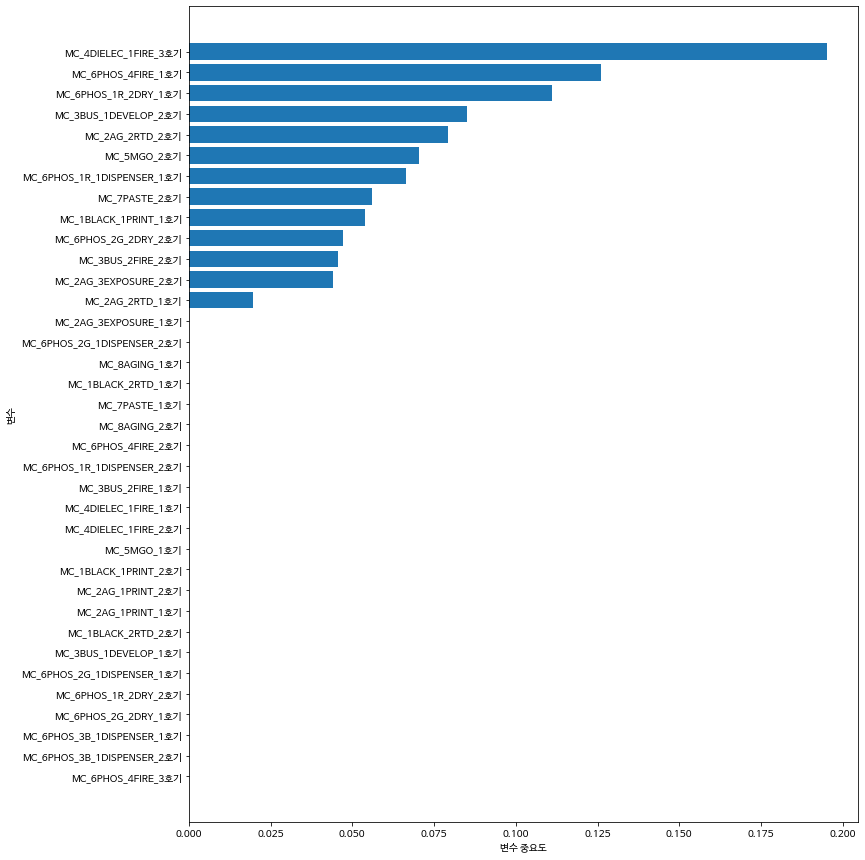

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize=(12, 15))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

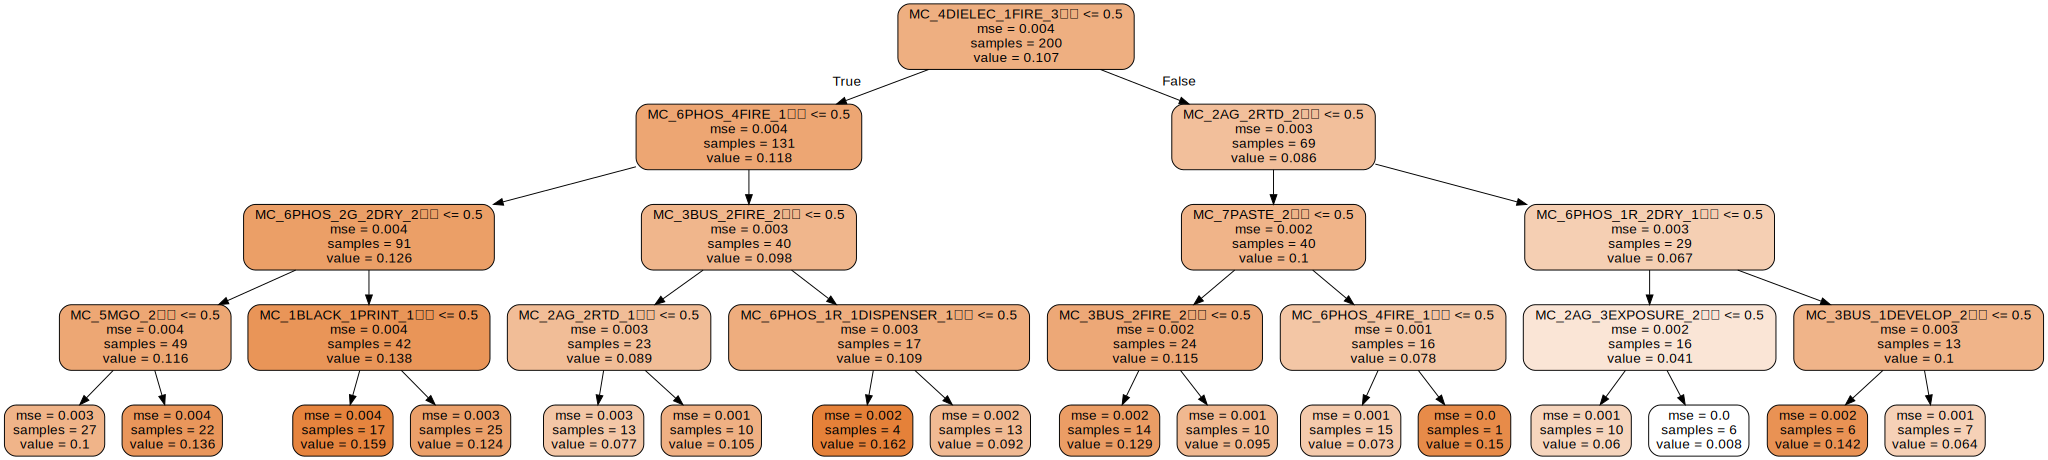

In [ ]:
export_graphviz(tree_final, out_file='TOTtree_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('TOTtree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 랜덤 포레스트 RF

In [ ]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor as RFR

df_raw_x_dummy = pd.get_dummies(df_raw_x)
v_feature_name = df_raw_x_dummy.columns

# 최종 모델
rf_final = RFR(
               max_depth=5,
               min_samples_leaf=50
               )
rf_final.fit(df_raw_x_dummy, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(rf_final.score(df_raw_x_dummy, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(15).round(3)

Accuracy on data set : 0.059


,Feature,Importance
6,MC_2AG_2RTD_1호기,0.28
10,MC_3BUS_1DEVELOP_1호기,0.13
11,MC_3BUS_1DEVELOP_2호기,0.12
26,MC_6PHOS_2G_2DRY_2호기,0.10
7,MC_2AG_2RTD_2호기,0.07
25,MC_6PHOS_2G_2DRY_1호기,0.07
16,MC_4DIELEC_1FIRE_3호기,0.05
34,MC_8AGING_1호기,0.02
3,MC_1BLACK_2RTD_2호기,0.02
22,MC_6PHOS_1R_2DRY_2호기,0.02


#### 그레디언트 부스팅 GB

In [ ]:
# 그레디언트 부스팅

from sklearn.ensemble import GradientBoostingRegressor as GBR

df_raw_x_dummy = pd.get_dummies(df_raw_x)
v_feature_name = df_raw_x_dummy.columns

# 최종 모델
gb_final = GBR(
               random_state=1234,
               n_estimators=50,
               max_depth=4,
               min_samples_split=10,
               min_samples_leaf=10,
               learning_rate=.1
               )
gb_final.fit(df_raw_x_dummy, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(gb_final.score(df_raw_x_dummy, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head().round(3)

Accuracy on data set : 0.703


,Feature,Importance
16,MC_4DIELEC_1FIRE_3호기,0.092
6,MC_2AG_2RTD_1호기,0.041
26,MC_6PHOS_2G_2DRY_2호기,0.041
10,MC_3BUS_1DEVELOP_1호기,0.038
29,MC_6PHOS_4FIRE_1호기,0.038


#### vital few
2AG_2RTD, 3BUS_1DEVELOP, 4DIELEC_1FIRE

### 결측치(제거), 이상치

# Process 인자 간의 유의차 분석 (VITAL FEW 도출) _ panel 당

#### 데이터 불러오기

In [ ]:
# 구글코랩
from google.colab import drive
drive.mount('/content/gdrive')

# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_merge_null_out.csv', engine='python', encoding='cp949')

print('shape :', df_raw.shape)
df_raw.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
shape : (3438, 133)


,JUDGE,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_PH_TANK1,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_PH_TANK2,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_PH_TANK3,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES1,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_HEAT1_CH01,BUS_FIRE_TEMP_HEAT1_CH02,BUS_FIRE_TEMP_HEAT1_CH03,BUS_FIRE_TEMP_HEAT2_CH01,BUS_FIRE_TEMP_HEAT2_CH02,BUS_FIRE_TEMP_HEAT2_CH03,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_HEAT1_CH01,DIELEC_FIRE_TEMP_HEAT1_CH02,DIELEC_FIRE_TEMP_HEAT1_CH03,DIELEC_FIRE_TEMP_HEAT2_CH01,DIELEC_FIRE_TEMP_HEAT2_CH02,DIELEC_FIRE_TEMP_HEAT2_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_KEEP_CH02,DIELEC_FIRE_TEMP_KEEP_CH03,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_HEAT_CH01,PHOS_FIRE_TEMP_HEAT_CH02,PHOS_FIRE_TEMP_HEAT_CH03,PHOS_FIRE_TEMP_HEAT_CH04,PHOS_FIRE_TEMP_KEEP_CH01,PHOS_FIRE_TEMP_KEEP_CH02,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,86,220,83,74,160,416,6900,6447,530,76,333,88,396,86,7140,0,10074,44.3,102.3,88.8,114.8,229.5,156.5,58.9,93.2,96.0,46.0,138.0,76.0,102.0,321.0,434.0,41.3,92.0,93.0,23.660,60.253,61.796,60.541,-0.33,23.496,9.200,30.753,6.548,34.305,0,2.030,2.052,164,190,213,261,287,330,567,583,599,572,538,519,296,342,349,455,453,474,569,573,582,570,552,534,2017,2200,3168,3639,3283,3148,3215,48.0,136.0,110.5,167.8,86.6,70.9,28.3,126.0,157.30,47.2,139.2,111.0,189.4,55.9,28.2,32.4,82.8,84.0,392,404,419,439,482,481,480,475,443,419,392,372,4115,3973,4432,2506,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,86,210,84,71,150,372,6693,6600,530,80,438,82,381,84,6956,0,10075,44.6,101.6,88.7,114.3,216.9,155.9,59.0,93.9,96.0,46.0,139.0,77.9,101.0,398.8,339.8,45.6,93.0,93.0,23.340,61.528,60.228,63.139,-0.33,23.420,9.200,30.800,6.550,35.300,0,2.032,2.010,164,190,212,261,287,330,569,584,600,574,541,520,296,342,349,454,453,473,573,573,582,575,558,536,2166,2132,2290,3331,3971,3030,2960,47.5,136.0,111.9,167.2,84.5,71.8,26.7,131.0,155.70

In [ ]:
df_raw['JUDGE'] = np.where(df_raw['JUDGE'] == '양품', 0, 1)

In [ ]:
df_raw_x = df_raw.drop(['JUDGE'], axis=1, inplace=False)
df_raw_y = df_raw['JUDGE']
df_raw_x.tail()

,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_PH_TANK1,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_PH_TANK2,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_PH_TANK3,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES1,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_HEAT1_CH01,BUS_FIRE_TEMP_HEAT1_CH02,BUS_FIRE_TEMP_HEAT1_CH03,BUS_FIRE_TEMP_HEAT2_CH01,BUS_FIRE_TEMP_HEAT2_CH02,BUS_FIRE_TEMP_HEAT2_CH03,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_HEAT1_CH01,DIELEC_FIRE_TEMP_HEAT1_CH02,DIELEC_FIRE_TEMP_HEAT1_CH03,DIELEC_FIRE_TEMP_HEAT2_CH01,DIELEC_FIRE_TEMP_HEAT2_CH02,DIELEC_FIRE_TEMP_HEAT2_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_KEEP_CH02,DIELEC_FIRE_TEMP_KEEP_CH03,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_HEAT_CH01,PHOS_FIRE_TEMP_HEAT_CH02,PHOS_FIRE_TEMP_HEAT_CH03,PHOS_FIRE_TEMP_HEAT_CH04,PHOS_FIRE_TEMP_KEEP_CH01,PHOS_FIRE_TEMP_KEEP_CH02,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
3433,LOT-300,PNL-13,88,210,84,69,160,384,6867,6480,530,80,369,80,396,86,7140,0,9749,44.8,108.6,88.6,115.4,192.0,156.9,59.4,94.0,95.6,47.0,138.0,78.9,102.0,354.3,347.0,45.8,92.0,92.9,23.456,60.757,60.105,60.605,-0.33,23.500,9.200,31.400,6.550,34.900,0,2.022,2.002,163,190,212,261,287,330,575,586,602,576,543,520,296,343,349,455,453,473,569,572,581,575,554,533,2007,2216,3171,3542,3295,3207,3238,47.4,136.0,110.7,166.5,87.6,74.8,28.4,156.0,156.8,48.5,141.4,114.4,191.7,63.0,31.8,34.7,83.4,84.3,393,405,420,441,480,480,480,475,443,421,392,372,3642,4065,4446,2585,2호기,1호기,1호기,1호기,1호기,2호기,1호기,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3434,LOT-300,PNL-14,86,220,87,69,142,356,6720,6540,530,78,393,100,399,100,6930,0,10077,44.0,114.6,88.2,113.5,215.3,150.0,58.4,94.0,96.2,46.2,138.0,78.8,101.2,320.2,413.4,46.3,94.0,94.0,23.600,60.730,62.971,62.098,-0.33,23.453,9.200,30.800,6.550,35.300,0,2.036,1.998,168,190,212,261,288,331,574,585,602,570,542,519,296,343,350,454,453,473,569,573,582,573,552,532,2028,2206,3251,3423,3580,3210,3160,47.2,136.0,111.1,167.7,87.3,70.7,28.2,130.0,154.0,45.4,1

In [ ]:
df_raw_x = df_raw.iloc[:, 20:116]
df_raw_x

,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_PH_TANK1,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_PH_TANK2,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_PH_TANK3,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES1,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_HEAT1_CH01,BUS_FIRE_TEMP_HEAT1_CH02,BUS_FIRE_TEMP_HEAT1_CH03,BUS_FIRE_TEMP_HEAT2_CH01,BUS_FIRE_TEMP_HEAT2_CH02,BUS_FIRE_TEMP_HEAT2_CH03,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_HEAT1_CH01,DIELEC_FIRE_TEMP_HEAT1_CH02,DIELEC_FIRE_TEMP_HEAT1_CH03,DIELEC_FIRE_TEMP_HEAT2_CH01,DIELEC_FIRE_TEMP_HEAT2_CH02,DIELEC_FIRE_TEMP_HEAT2_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_KEEP_CH02,DIELEC_FIRE_TEMP_KEEP_CH03,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_HEAT_CH01,PHOS_FIRE_TEMP_HEAT_CH02,PHOS_FIRE_TEMP_HEAT_CH03,PHOS_FIRE_TEMP_HEAT_CH04,PHOS_FIRE_TEMP_KEEP_CH01,PHOS_FIRE_TEMP_KEEP_CH02,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,44.3,102.3,88.8,114.8,229.5,156.5,58.9,93.2,96.0,46.0,138.0,76.0,102.0,321.0,434.0,41.3,92.0,93.0,23.660,60.253,61.796,60.541,-0.33,23.496,9.200,30.753,6.548,34.305,0,2.030,2.052,164,190,213,261,287,330,567,583,599,572,538,519,296,342,349,455,453,474,569,573,582,570,552,534,2017,2200,3168,3639,3283,3148,3215,48.0,136.0,110.5,167.8,86.6,70.9,28.3,126.0,157.30,47.2,139.2,111.0,189.4,55.9,28.2,32.4,82.8,84.0,392,404,419,439,482,481,480,475,443,419,392,372,4115,3973,4432,2506
1,44.6,101.6,88.7,114.3,216.9,155.9,59.0,93.9,96.0,46.0,139.0,77.9,101.0,398.8,339.8,45.6,93.0,93.0,23.340,61.528,60.228,63.139,-0.33,23.420,9.200,30.800,6.550,35.300,0,2.032,2.010,164,190,212,261,287,330,569,584,600,574,541,520,296,342,349,454,453,473,573,573,582,575,558,536,2166,2132,2290,3331,3971,3030,2960,47.5,136.0,111.9,167.2,84.5,71.8,26.7,131.0,155.70,46.5,138.8,106.0,186.3,59.8,28.1,32.9,80.3,81.8,393,405,420,440,480,480,480,475,445,423,395,374,3642,4097,4499,2573
2,45.0,114.3,90.3,115.0,217.4,140.6,58.7,94.0,95.7,45.0,138.0,77.0,102.0,358.0,347.0,43.6,93.0,94.0,23.600,61.415,63.796,63.500,-0.33,23.139,9.200,30.694,6.549,33.015,0,2.033,2.061,164,190,212,261,287,330,573,584,600,575,536,519,296,342,349,454,453,473,568,572,582,570,553,535,1984,2178,3194,3484,3324,3182,3123,47.3,136.0,110.6,168.5,85.4,73.6,27.5,131.0,156.30,46.9,139.0,108.4,187.9,48.5,30.3,29.4,81.2,82.2,393,405,420,440,480,480,480,475,444,421,393,372,4063,3972,4460,2502
3,44.0,115.0,88.6,115.4,242.5,152.4,58.8,94.0,97.0,46.1,138.0,77.8,101.1,356.4,438.1,45.1,93.0,93.0,23.424,61.446,60.800,64.220,-0.33,23.376,9.199,30.691,6.550,32.760,0,2.030,2.062,164,190,211,261,287,329,561,578,5

## PROCESS_TOTAL

#### ANOVA

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_list = df_raw_x.columns.to_list()

for i in df_list :
  model = ols('JUDGE ~ C(%s)'%i, df_raw).fit()
  print(anova_lm(model))
  print()

                                   df   sum_sq  mean_sq      F     PR(>F)
C(BLACK_RTD_TEMP_GLASS_START)    57.0   20.892    0.367  3.985  2.912e-21
Residual                       3380.0  310.857    0.092    NaN        NaN

                                 df   sum_sq  mean_sq      F     PR(>F)
C(BLACK_RTD_TEMP_GLASS_END)   210.0   61.068    0.291  3.467  1.526e-50
Residual                     3227.0  270.680    0.084    NaN        NaN

                                  df   sum_sq  mean_sq      F     PR(>F)
C(BLACK_RTD_TEMP_WALL_START)    52.0   18.222    0.350  3.783  5.016e-18
Residual                      3385.0  313.527    0.093    NaN        NaN

                                df   sum_sq  mean_sq      F     PR(>F)
C(BLACK_RTD_TEMP_WALL_MAX)    44.0   16.117    0.366  3.938  1.031e-16
Residual                    3393.0  315.632    0.093    NaN        NaN

                             df   sum_sq  mean_sq      F      PR(>F)
C(BLACK_RTD_PRES_START)   496.0  165.060    0.333  5.871 

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                               df   sum_sq  mean_sq      F      PR(>F)
C(BUS_DEVELOP_TEMP_TANK1)   343.0  141.237    0.412  6.687  9.459e-197
Residual                   3094.0  190.511    0.062    NaN         NaN

                             df   sum_sq  mean_sq      F     PR(>F)
C(BUS_DEVELOP_PH_TANK2)    16.0   10.991    0.687  7.326  4.020e-17
Residual                 3421.0  320.758    0.094    NaN        NaN

                               df   sum_sq  mean_sq       F      PR(>F)
C(BUS_DEVELOP_TEMP_TANK2)   359.0  178.981    0.499  10.045  1.825e-319
Residual                   3078.0  152.767    0.050     NaN         NaN

                             df   sum_sq  mean_sq       F     PR(>F)
C(BUS_DEVELOP_PH_TANK3)    45.0   49.191    1.093  13.123  1.297e-87
Residual                 3392.0  282.558    0.083     NaN        NaN

                               df   sum_sq  mean_sq      F      PR(>F)
C(BUS_DEVELOP_TEMP_TANK3)   377.0  177.482    0.471  9.338  9.823e-305
Residual      

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                          df   sum_sq  mean_sq      F     PR(>F)
C(BUS_DEVELOP_PRES2)   159.0   40.865    0.257  2.896  2.363e-28
Residual              3278.0  290.884    0.089    NaN        NaN

                          df   sum_sq  mean_sq      F      PR(>F)
C(BUS_DEVELOP_PRES3)   416.0  149.467    0.359  5.955  3.240e-192
Residual              3021.0  182.282    0.060    NaN         NaN

                                 df   sum_sq  mean_sq      F  PR(>F)
C(BUS_FIRE_TEMP_HEAT1_CH01)     8.0    0.653    0.082  0.845   0.562
Residual                     3429.0  331.096    0.097    NaN     NaN

                                 df   sum_sq  mean_sq      F  PR(>F)
C(BUS_FIRE_TEMP_HEAT1_CH02)     1.0    0.035    0.035  0.364   0.546
Residual                     3436.0  331.714    0.097    NaN     NaN

                                 df   sum_sq  mean_sq      F  PR(>F)
C(BUS_FIRE_TEMP_HEAT1_CH03)     5.0    1.633    0.327  3.395   0.005
Residual                     3432.0  330.116    0.0

#### 의사결정나무 DT

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = df_raw_x.columns

# 최종 모델
tree_final = DTR(
                 random_state=1234,
                 max_depth=4
                )
tree_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head().round(3)

Accuracy on data set : 0.569


,Feature,Importance
15,AG_RTD_TEMP_GLASS_OUT,0.643
25,BUS_DEVELOP_TEMP_TANK2,0.267
23,BUS_DEVELOP_TEMP_TANK1,0.052
18,AG_EXPOSURE_TEMP_MASK,0.033
49,DIELEC_FIRE_TEMP_KEEP_CH01,0.005


Text(0, 0.5, '변수')

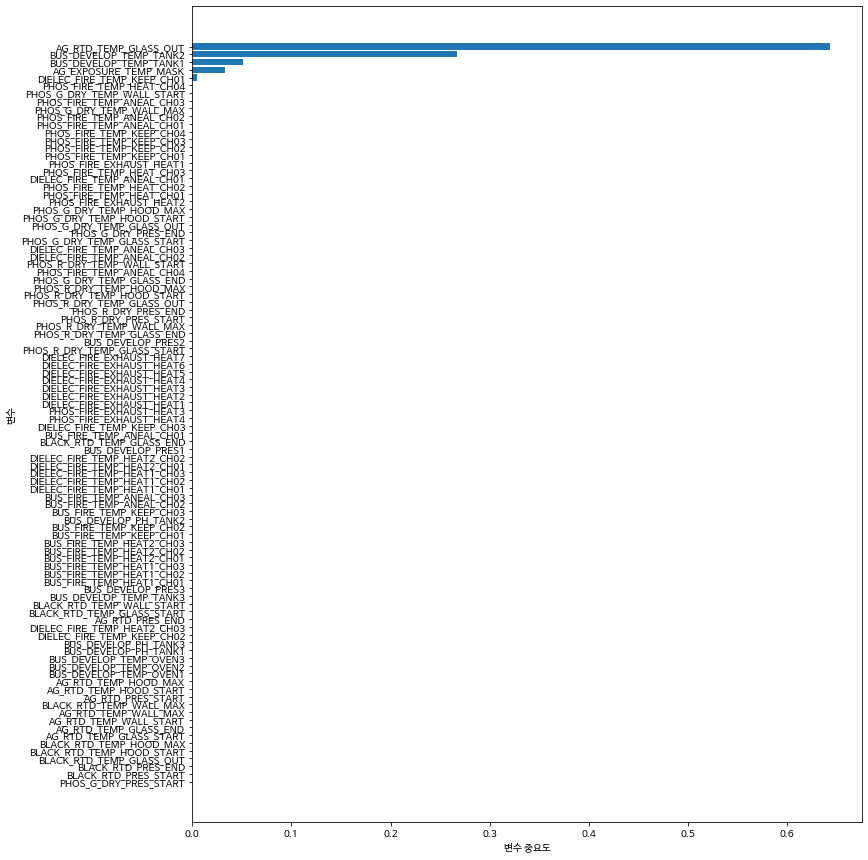

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize=(12, 15))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

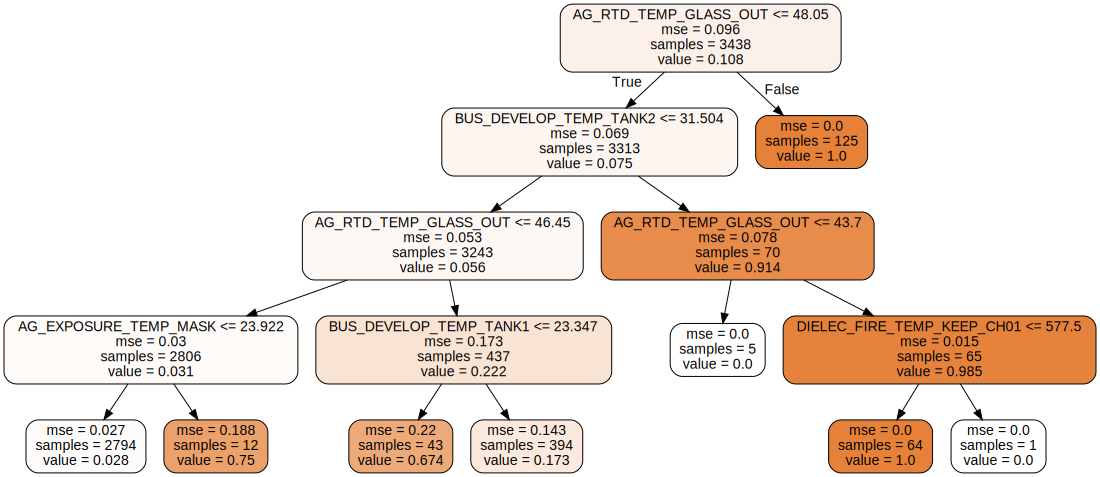

In [ ]:
export_graphviz(tree_final, out_file='PROALLtree_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('PROALLtree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

## PROCESS_AG_RTD

#### 데이터 구성하기

In [ ]:
df_raw_x = df_raw[['AG_RTD_TEMP_GLASS_START',
                   'AG_RTD_TEMP_GLASS_END',
                   'AG_RTD_TEMP_WALL_START',
                   'AG_RTD_TEMP_WALL_MAX',
                   'AG_RTD_PRES_START',
                   'AG_RTD_PRES_END',
                   'AG_RTD_TEMP_GLASS_OUT',
                   'AG_RTD_TEMP_HOOD_START',
                   'AG_RTD_TEMP_HOOD_MAX']]
df_raw_x.head()

,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX
0,46.0,138.0,76.0,102.0,321.0,434.0,41.3,92.0,93.0
1,46.0,139.0,77.9,101.0,398.8,339.8,45.6,93.0,93.0
2,45.0,138.0,77.0,102.0,358.0,347.0,43.6,93.0,94.0
3,46.1,138.0,77.8,101.1,356.4,438.1,45.1,93.0,93.0
4,47.0,138.0,77.8,101.4,327.8,398.4,45.7,92.0,93.0


#### ANOVA

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_list = df_raw_x.columns.to_list()

for i in df_list :
  model = ols('JUDGE ~ C(%s)'%i, df_raw).fit()
  print(anova_lm(model))
  print()

                                df   sum_sq  mean_sq      F     PR(>F)
C(AG_RTD_TEMP_GLASS_START)    50.0   19.832    0.397  4.307  1.525e-21
Residual                    3387.0  311.916    0.092    NaN        NaN

                              df   sum_sq  mean_sq      F     PR(>F)
C(AG_RTD_TEMP_GLASS_END)    11.0    7.289    0.663  6.997  7.909e-12
Residual                  3426.0  324.459    0.095    NaN        NaN

                               df   sum_sq  mean_sq      F     PR(>F)
C(AG_RTD_TEMP_WALL_START)    58.0   41.566    0.717  8.345  3.692e-63
Residual                   3379.0  290.182    0.086    NaN        NaN

                             df   sum_sq  mean_sq      F     PR(>F)
C(AG_RTD_TEMP_WALL_MAX)    47.0   20.236    0.431  4.685  2.706e-23
Residual                 3390.0  311.513    0.092    NaN        NaN

                          df   sum_sq  mean_sq      F      PR(>F)
C(AG_RTD_PRES_START)   536.0  176.099    0.329  6.123  4.129e-230
Residual              2901.0  

#### 의사결정나무 DT

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = df_raw_x.columns

# 최종 모델
tree_final = DTC(
                 max_depth=5
                )
tree_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.942


,Feature,Importance
6,AG_RTD_TEMP_GLASS_OUT,0.771
2,AG_RTD_TEMP_WALL_START,0.144
5,AG_RTD_PRES_END,0.028
4,AG_RTD_PRES_START,0.017
3,AG_RTD_TEMP_WALL_MAX,0.017
1,AG_RTD_TEMP_GLASS_END,0.012
8,AG_RTD_TEMP_HOOD_MAX,0.011
0,AG_RTD_TEMP_GLASS_START,0.000
7,AG_RTD_TEMP_HOOD_START,0.000


Text(0, 0.5, '변수')

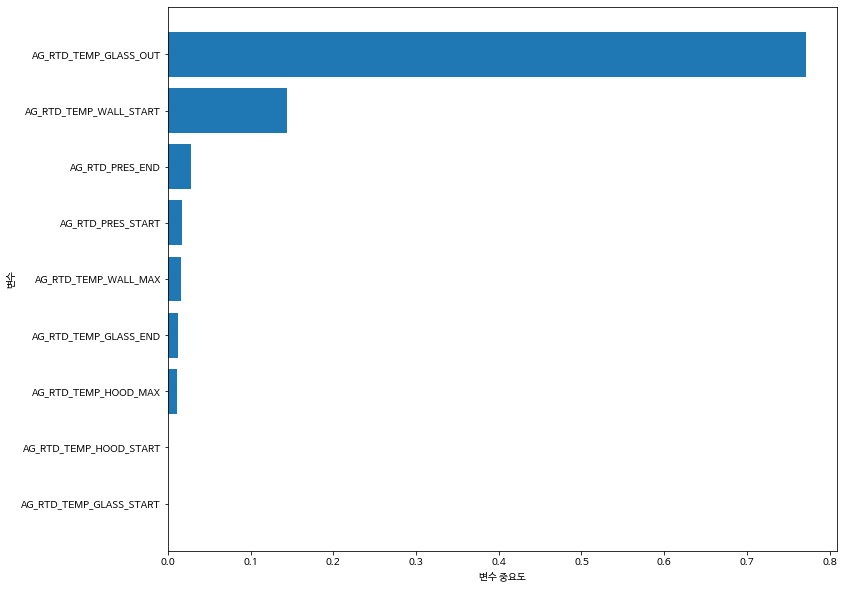

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize=(12, 10))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

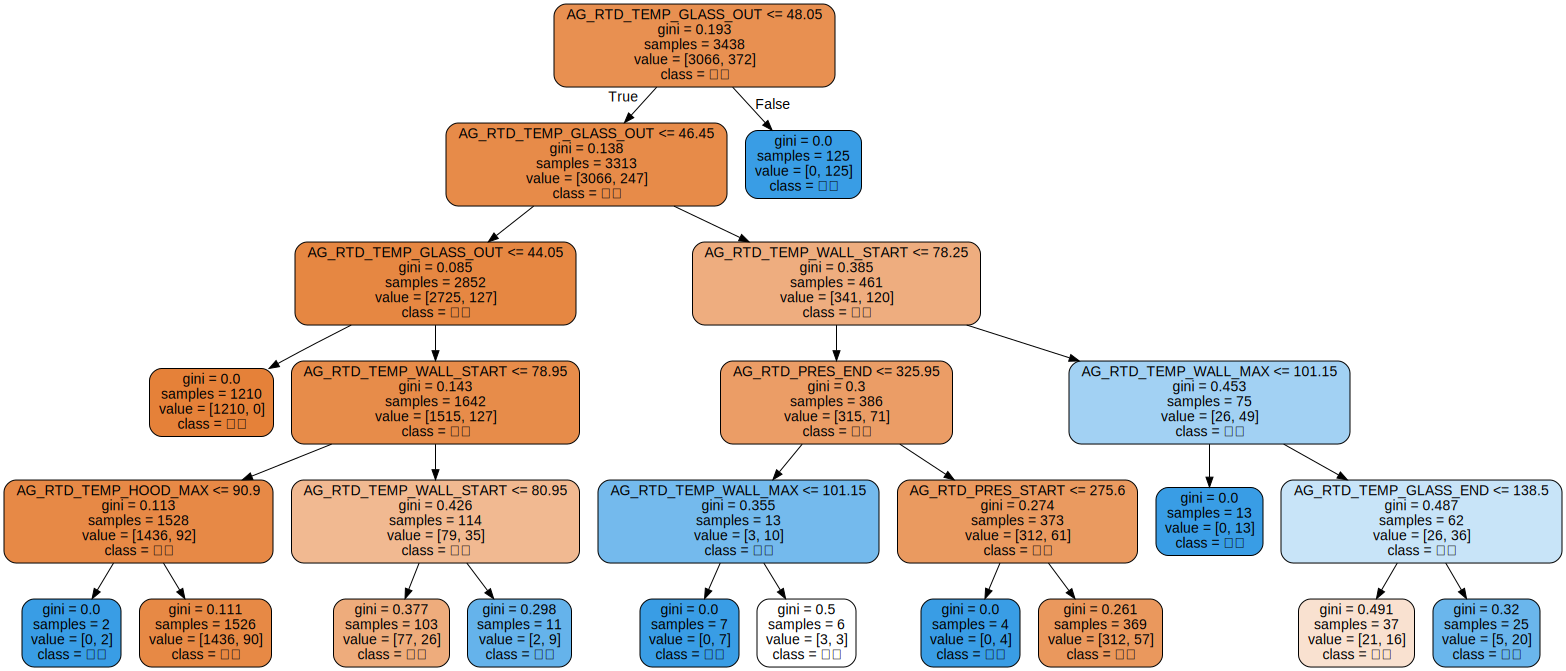

In [ ]:
export_graphviz(tree_final, out_file='ag_tree_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('ag_tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 랜덤 포레스트 RF

In [ ]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier as RFC
v_feature_name = df_raw_x.columns

# 최종 모델
rf_final = RFC(
               max_depth=4
               )
rf_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(rf_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Accuracy on data set : 0.932


,Feature,Importance
6,AG_RTD_TEMP_GLASS_OUT,0.753
2,AG_RTD_TEMP_WALL_START,0.071
5,AG_RTD_PRES_END,0.043
8,AG_RTD_TEMP_HOOD_MAX,0.034
0,AG_RTD_TEMP_GLASS_START,0.026
7,AG_RTD_TEMP_HOOD_START,0.024
4,AG_RTD_PRES_START,0.020
1,AG_RTD_TEMP_GLASS_END,0.019
3,AG_RTD_TEMP_WALL_MAX,0.010


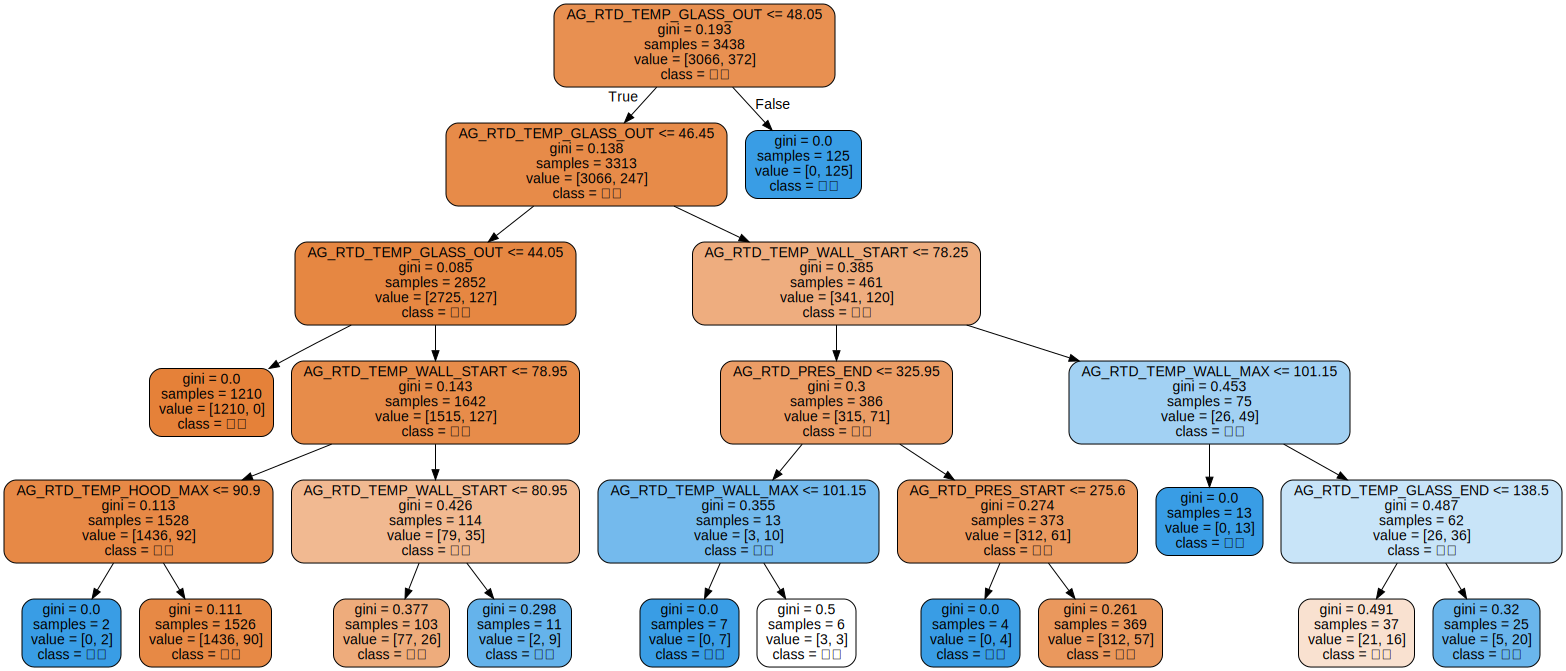

In [ ]:
export_graphviz(tree_final, out_file='ag_rf_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('ag_rf_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 그레디언트 부스팅 GB

In [ ]:
# 그레디언트 부스팅

from sklearn.ensemble import GradientBoostingClassifier as GBC
v_feature_name = df_raw_x.columns

# 최종 모델
gb_final = GBC(
               random_state=1234,
               n_estimators=50,
               max_depth=4,
               min_samples_split=10,
               min_samples_leaf=10,
               learning_rate=.1
               )
gb_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(gb_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Accuracy on data set : 0.953


,Feature,Importance
6,AG_RTD_TEMP_GLASS_OUT,0.693
2,AG_RTD_TEMP_WALL_START,0.130
5,AG_RTD_PRES_END,0.063
4,AG_RTD_PRES_START,0.037
0,AG_RTD_TEMP_GLASS_START,0.028
3,AG_RTD_TEMP_WALL_MAX,0.020
7,AG_RTD_TEMP_HOOD_START,0.016
8,AG_RTD_TEMP_HOOD_MAX,0.008
1,AG_RTD_TEMP_GLASS_END,0.005


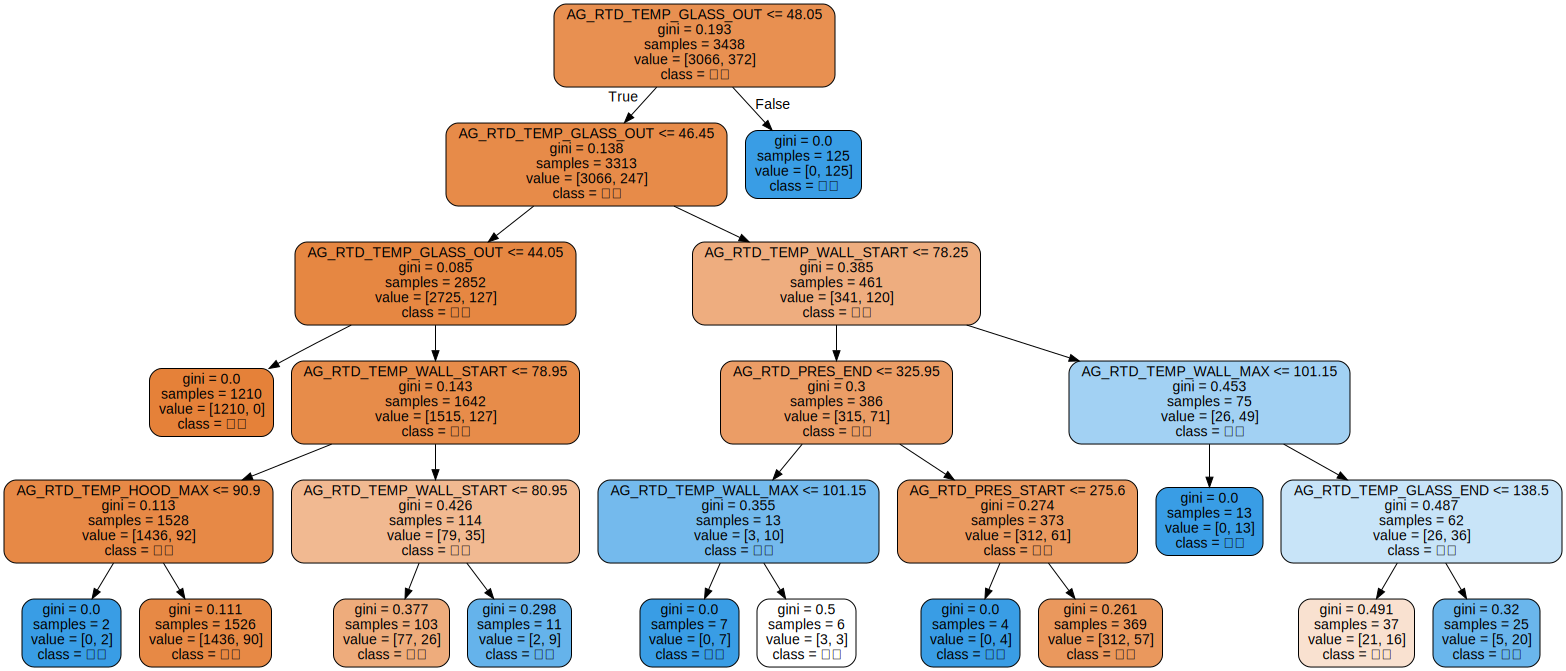

In [ ]:
export_graphviz(tree_final, out_file='ag_gb_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('ag_gb_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

## PROCESS_BUS_DEVELOP


#### 데이터 구성하기

In [ ]:
df_raw_x = df_raw[['BUS_DEVELOP_TEMP_OVEN1',
                   'BUS_DEVELOP_TEMP_OVEN2',
                   'BUS_DEVELOP_TEMP_OVEN3',
                   'BUS_DEVELOP_PH_TANK1',
                   'BUS_DEVELOP_TEMP_TANK1',
                   'BUS_DEVELOP_PH_TANK2',
                   'BUS_DEVELOP_TEMP_TANK2',
                   'BUS_DEVELOP_PH_TANK3',
                   'BUS_DEVELOP_TEMP_TANK3',
                   'BUS_DEVELOP_PRES1',
                   'BUS_DEVELOP_PRES2',
                   'BUS_DEVELOP_PRES3']]
df_raw_x.head()

,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_PH_TANK1,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_PH_TANK2,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_PH_TANK3,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES1,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3
0,60.253,61.796,60.541,-0.33,23.496,9.200,30.753,6.548,34.305,0,2.030,2.052
1,61.528,60.228,63.139,-0.33,23.420,9.200,30.800,6.550,35.300,0,2.032,2.010
2,61.415,63.796,63.500,-0.33,23.139,9.200,30.694,6.549,33.015,0,2.033,2.061
3,61.446,60.800,64.220,-0.33,23.376,9.199,30.691,6.550,32.760,0,2.030,2.062
4,60.260,61.601,60.558,-0.33,23.358,9.199,31.032,6.549,33.867,0,2.032,2.060


#### ANOVA

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_list = df_raw_x.columns.to_list()

for i in df_list :
  model = ols('JUDGE ~ C(%s)'%i, df_raw).fit()
  print(anova_lm(model))
  print()

                               df   sum_sq  mean_sq      F      PR(>F)
C(BUS_DEVELOP_TEMP_OVEN1)   580.0  197.693    0.341  7.264  2.196e-291
Residual                   2857.0  134.056    0.047    NaN         NaN

                               df   sum_sq  mean_sq      F      PR(>F)
C(BUS_DEVELOP_TEMP_OVEN2)   606.0  197.064    0.325  6.835  7.300e-278
Residual                   2831.0  134.685    0.048    NaN         NaN

                               df   sum_sq  mean_sq      F  PR(>F)
C(BUS_DEVELOP_TEMP_OVEN3)   605.0  209.021    0.345  7.972     0.0
Residual                   2832.0  122.728    0.043    NaN     NaN

                             df   sum_sq  mean_sq   F  PR(>F)
C(BUS_DEVELOP_PH_TANK1)     0.0    0.000      NaN NaN     NaN
Residual                 3437.0  331.749    0.097 NaN     NaN



/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                               df   sum_sq  mean_sq      F      PR(>F)
C(BUS_DEVELOP_TEMP_TANK1)   343.0  141.237    0.412  6.687  9.459e-197
Residual                   3094.0  190.511    0.062    NaN         NaN

                             df   sum_sq  mean_sq      F     PR(>F)
C(BUS_DEVELOP_PH_TANK2)    16.0   10.991    0.687  7.326  4.020e-17
Residual                 3421.0  320.758    0.094    NaN        NaN

                               df   sum_sq  mean_sq       F      PR(>F)
C(BUS_DEVELOP_TEMP_TANK2)   359.0  178.981    0.499  10.045  1.825e-319
Residual                   3078.0  152.767    0.050     NaN         NaN

                             df   sum_sq  mean_sq       F     PR(>F)
C(BUS_DEVELOP_PH_TANK3)    45.0   49.191    1.093  13.123  1.297e-87
Residual                 3392.0  282.558    0.083     NaN        NaN

                               df   sum_sq  mean_sq      F      PR(>F)
C(BUS_DEVELOP_TEMP_TANK3)   377.0  177.482    0.471  9.338  9.823e-305
Residual      

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                          df   sum_sq  mean_sq      F     PR(>F)
C(BUS_DEVELOP_PRES2)   159.0   40.865    0.257  2.896  2.363e-28
Residual              3278.0  290.884    0.089    NaN        NaN

                          df   sum_sq  mean_sq      F      PR(>F)
C(BUS_DEVELOP_PRES3)   416.0  149.467    0.359  5.955  3.240e-192
Residual              3021.0  182.282    0.060    NaN         NaN



#### 의사결정나무 DT

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = df_raw_x.columns

# 최종 모델
tree_final = DTC(
                 max_depth=4
                )
tree_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.936


,Feature,Importance
6,BUS_DEVELOP_TEMP_TANK2,0.637
4,BUS_DEVELOP_TEMP_TANK1,0.190
11,BUS_DEVELOP_PRES3,0.066
5,BUS_DEVELOP_PH_TANK2,0.051
7,BUS_DEVELOP_PH_TANK3,0.027
2,BUS_DEVELOP_TEMP_OVEN3,0.019
1,BUS_DEVELOP_TEMP_OVEN2,0.009
0,BUS_DEVELOP_TEMP_OVEN1,0.000
3,BUS_DEVELOP_PH_TANK1,0.000
8,BUS_DEVELOP_TEMP_TANK3,0.000


Text(0, 0.5, '변수')

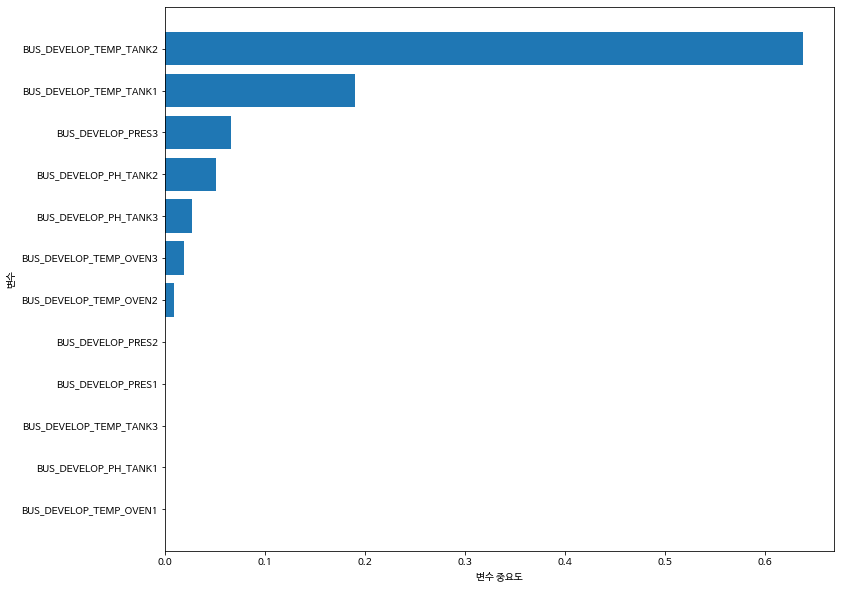

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize=(12, 10))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

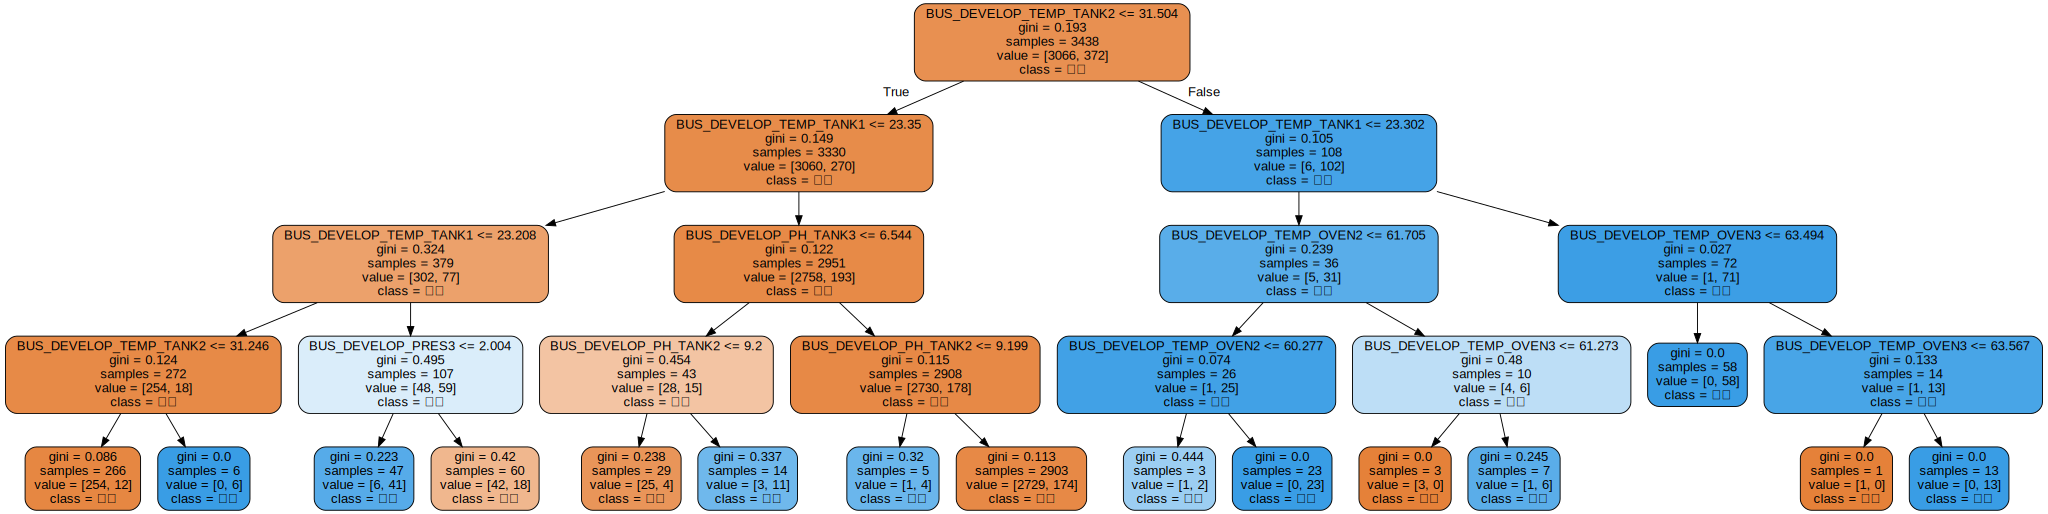

In [ ]:
export_graphviz(tree_final, out_file='bus_tree_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('bus_tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 랜덤 포레스트 RF

In [ ]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier as RFC
v_feature_name = df_raw_x.columns

# 최종 모델
rf_final = RFC(
               max_depth=4
               )
rf_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(rf_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Accuracy on data set : 0.927


,Feature,Importance
6,BUS_DEVELOP_TEMP_TANK2,0.468
4,BUS_DEVELOP_TEMP_TANK1,0.138
7,BUS_DEVELOP_PH_TANK3,0.109
8,BUS_DEVELOP_TEMP_TANK3,0.084
11,BUS_DEVELOP_PRES3,0.078
5,BUS_DEVELOP_PH_TANK2,0.061
0,BUS_DEVELOP_TEMP_OVEN1,0.019
10,BUS_DEVELOP_PRES2,0.016
1,BUS_DEVELOP_TEMP_OVEN2,0.015
2,BUS_DEVELOP_TEMP_OVEN3,0.013


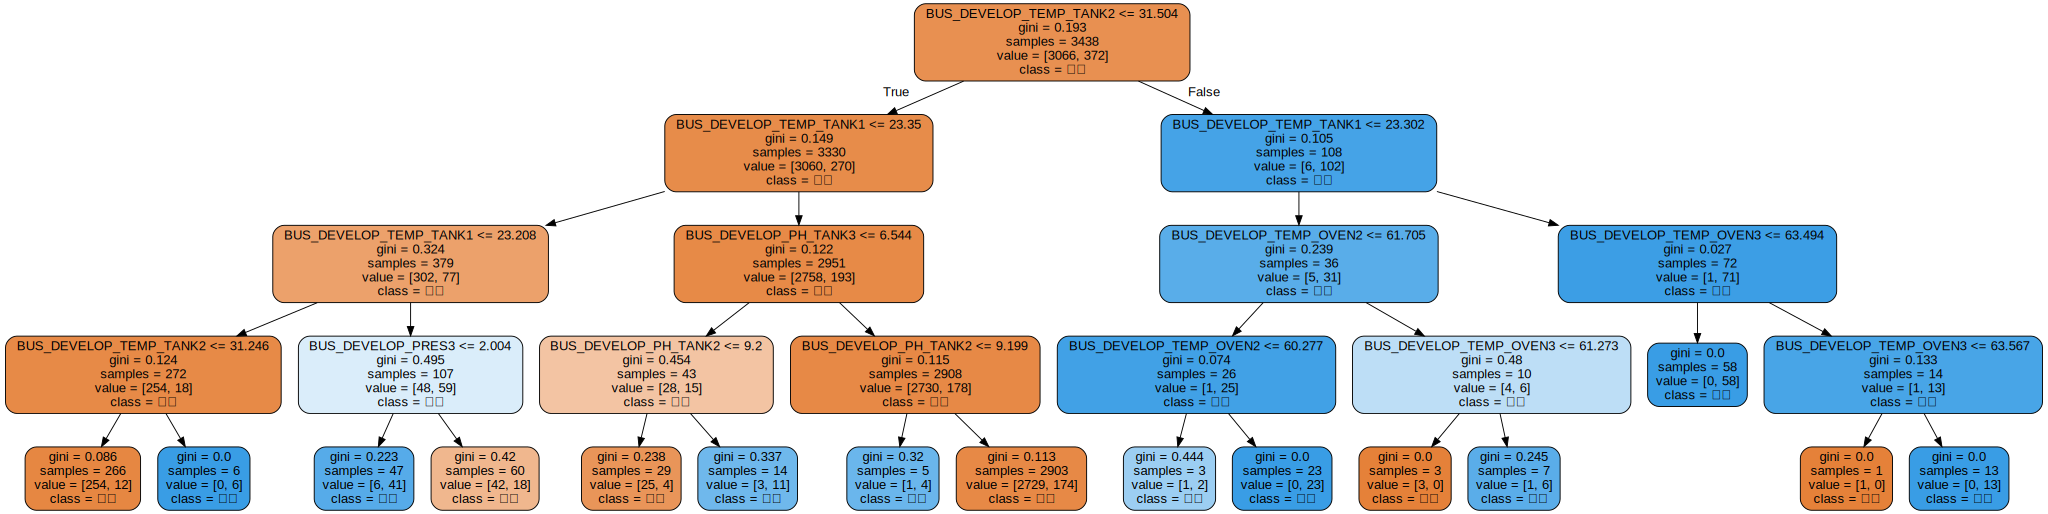

In [ ]:
export_graphviz(tree_final, out_file='bus_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('bus_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 그레디언트 부스팅 GB

In [ ]:
# 그레디언트 부스팅

from sklearn.ensemble import GradientBoostingClassifier as GBC
v_feature_name = df_raw_x.columns

# 최종 모델
gb_final = GBC(
               random_state=1234,
               n_estimators=50,
               max_depth=4,
               min_samples_split=10,
               min_samples_leaf=10,
               learning_rate=.1
               )
gb_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(gb_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Accuracy on data set : 0.954


,Feature,Importance
6,BUS_DEVELOP_TEMP_TANK2,0.460
4,BUS_DEVELOP_TEMP_TANK1,0.234
11,BUS_DEVELOP_PRES3,0.106
8,BUS_DEVELOP_TEMP_TANK3,0.100
5,BUS_DEVELOP_PH_TANK2,0.029
7,BUS_DEVELOP_PH_TANK3,0.027
0,BUS_DEVELOP_TEMP_OVEN1,0.014
2,BUS_DEVELOP_TEMP_OVEN3,0.014
1,BUS_DEVELOP_TEMP_OVEN2,0.009
10,BUS_DEVELOP_PRES2,0.007


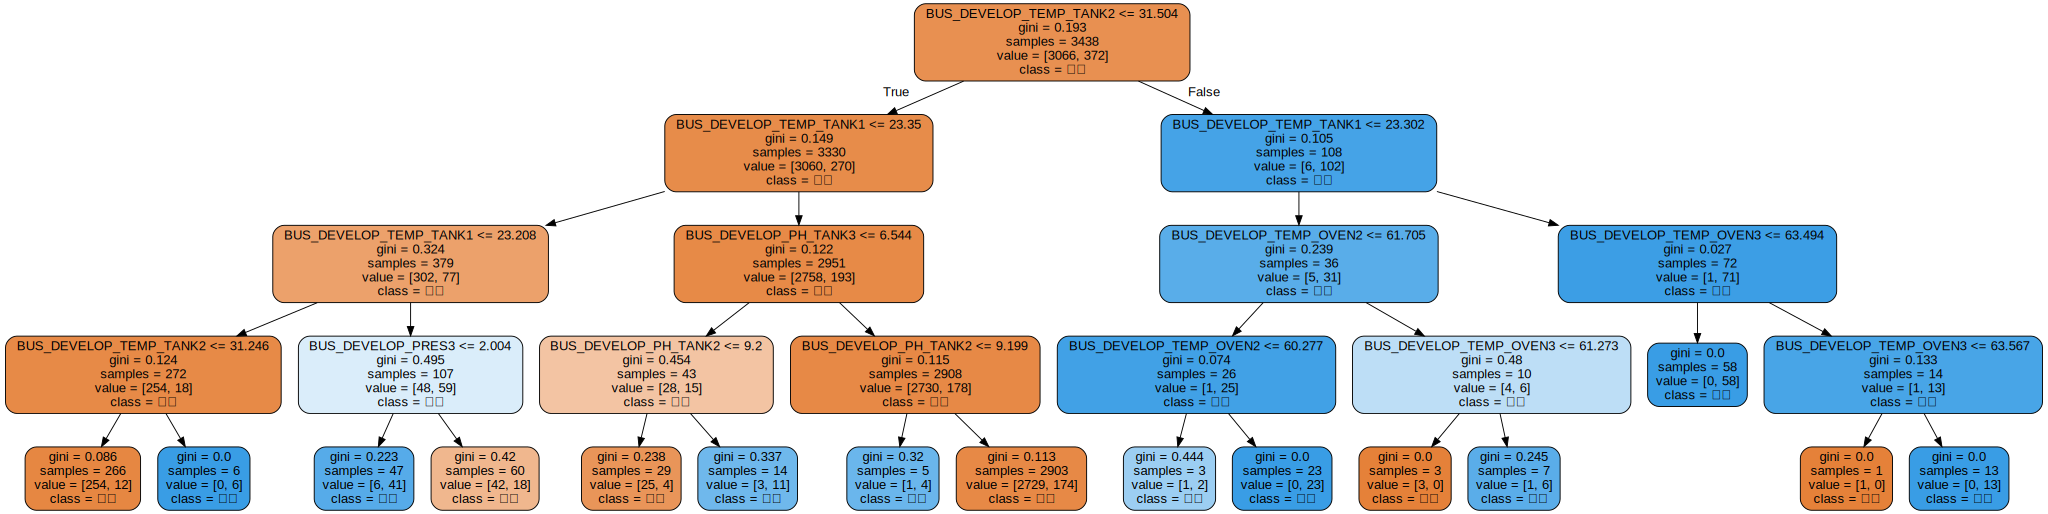

In [ ]:
export_graphviz(tree_final, out_file='bus_gb_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('bus_gb_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

## PROCESS_DIELEC_FIRE

#### 데이터 구성하기

In [ ]:
df_raw_x = df_raw[['DIELEC_FIRE_TEMP_HEAT1_CH01',
                   'DIELEC_FIRE_TEMP_HEAT1_CH02',
                   'DIELEC_FIRE_TEMP_HEAT1_CH03',
                   'DIELEC_FIRE_TEMP_HEAT2_CH01',
                   'DIELEC_FIRE_TEMP_HEAT2_CH02',
                   'DIELEC_FIRE_TEMP_HEAT2_CH03',
                   'DIELEC_FIRE_TEMP_KEEP_CH01',
                   'DIELEC_FIRE_TEMP_KEEP_CH02',
                   'DIELEC_FIRE_TEMP_KEEP_CH03',
                   'DIELEC_FIRE_TEMP_ANEAL_CH01',
                   'DIELEC_FIRE_TEMP_ANEAL_CH02',
                   'DIELEC_FIRE_TEMP_ANEAL_CH03',
                   'DIELEC_FIRE_EXHAUST_HEAT1',
                   'DIELEC_FIRE_EXHAUST_HEAT2',
                   'DIELEC_FIRE_EXHAUST_HEAT3',
                   'DIELEC_FIRE_EXHAUST_HEAT4',
                   'DIELEC_FIRE_EXHAUST_HEAT5',
                   'DIELEC_FIRE_EXHAUST_HEAT6',
                   'DIELEC_FIRE_EXHAUST_HEAT7']]
df_raw_x.head()

,DIELEC_FIRE_TEMP_HEAT1_CH01,DIELEC_FIRE_TEMP_HEAT1_CH02,DIELEC_FIRE_TEMP_HEAT1_CH03,DIELEC_FIRE_TEMP_HEAT2_CH01,DIELEC_FIRE_TEMP_HEAT2_CH02,DIELEC_FIRE_TEMP_HEAT2_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_KEEP_CH02,DIELEC_FIRE_TEMP_KEEP_CH03,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7
0,296,342,349,455,453,474,569,573,582,570,552,534,2017,2200,3168,3639,3283,3148,3215
1,296,342,349,454,453,473,573,573,582,575,558,536,2166,2132,2290,3331,3971,3030,2960
2,296,342,349,454,453,473,568,572,582,570,553,535,1984,2178,3194,3484,3324,3182,3123
3,296,342,349,454,453,473,569,573,582,571,551,533,2024,2220,3230,3574,3306,3338,3168
4,297,342,349,454,452,473,575,572,581,572,556,533,2163,2128,2330,3269,3900,3037,2949


#### ANOVA

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_list = df_raw_x.columns.to_list()

for i in df_list :
  model = ols('JUDGE ~ C(%s)'%i, df_raw).fit()
  print(anova_lm(model))
  print()

                                    df   sum_sq  mean_sq      F  PR(>F)
C(DIELEC_FIRE_TEMP_HEAT1_CH01)     5.0    0.520    0.104  1.078    0.37
Residual                        3432.0  331.228    0.097    NaN     NaN

                                    df   sum_sq  mean_sq      F  PR(>F)
C(DIELEC_FIRE_TEMP_HEAT1_CH02)     9.0    2.354    0.262  2.722   0.004
Residual                        3428.0  329.395    0.096    NaN     NaN

                                    df   sum_sq  mean_sq     F     PR(>F)
C(DIELEC_FIRE_TEMP_HEAT1_CH03)     5.0    3.416    0.683  7.14  1.178e-06
Residual                        3432.0  328.333    0.096   NaN        NaN

                                    df   sum_sq  mean_sq      F  PR(>F)
C(DIELEC_FIRE_TEMP_HEAT2_CH01)     5.0    1.514    0.303  3.147   0.008
Residual                        3432.0  330.235    0.096    NaN     NaN

                                    df   sum_sq  mean_sq      F  PR(>F)
C(DIELEC_FIRE_TEMP_HEAT2_CH02)     5.0    1.155    0.2

#### 의사결정나무 DT

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = df_raw_x.columns

# 최종 모델
tree_final = DTC(
                 max_depth=4
                )
tree_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.923


,Feature,Importance
16,DIELEC_FIRE_EXHAUST_HEAT5,0.391
18,DIELEC_FIRE_EXHAUST_HEAT7,0.305
14,DIELEC_FIRE_EXHAUST_HEAT3,0.111
3,DIELEC_FIRE_TEMP_HEAT2_CH01,0.108
15,DIELEC_FIRE_EXHAUST_HEAT4,0.059
12,DIELEC_FIRE_EXHAUST_HEAT1,0.012
9,DIELEC_FIRE_TEMP_ANEAL_CH01,0.009
11,DIELEC_FIRE_TEMP_ANEAL_CH03,0.005
7,DIELEC_FIRE_TEMP_KEEP_CH02,0.000
8,DIELEC_FIRE_TEMP_KEEP_CH03,0.000


Text(0, 0.5, '변수')

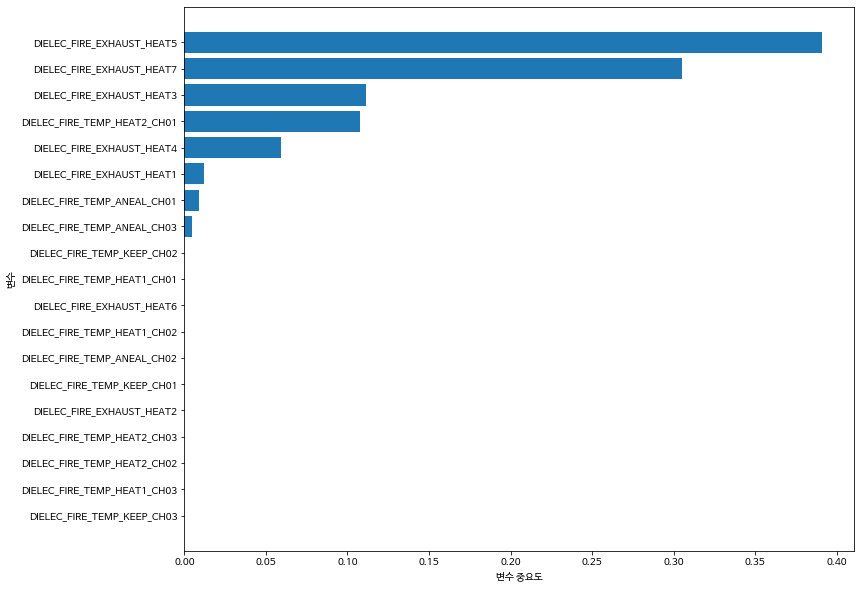

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize=(12, 10))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

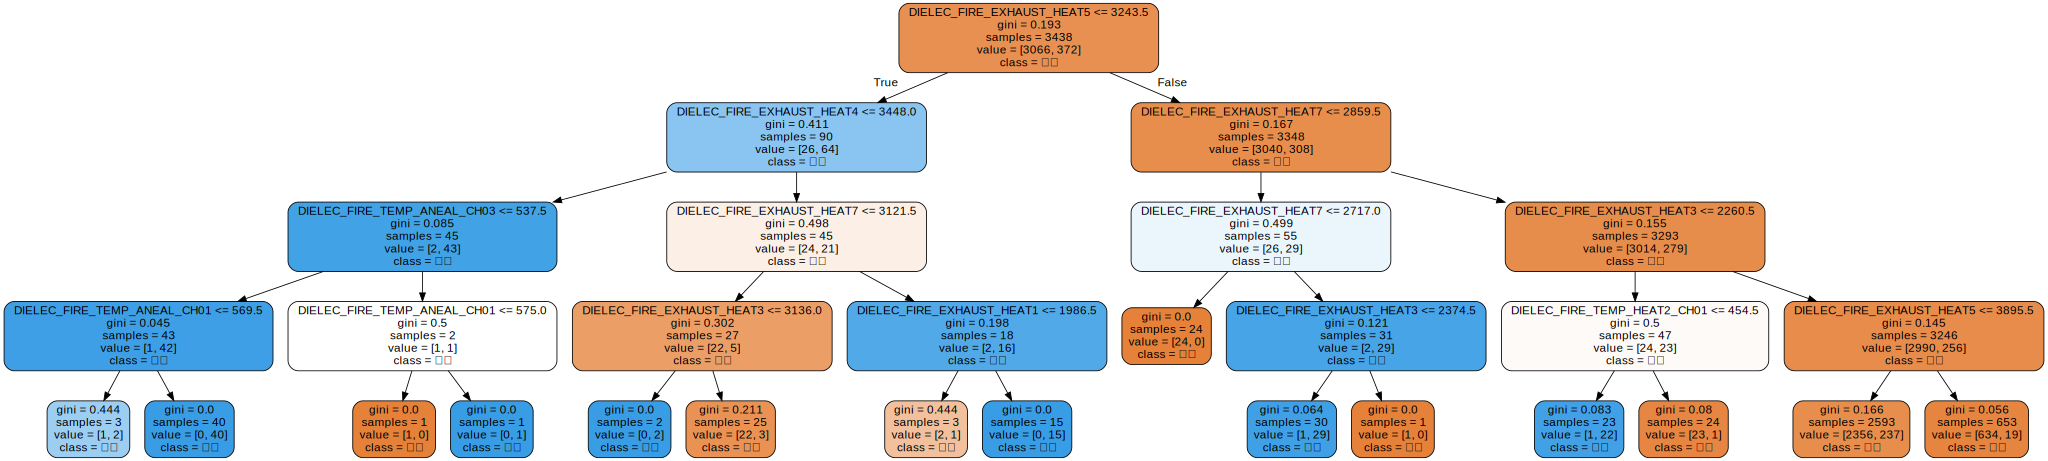

In [ ]:
export_graphviz(tree_final, out_file='di_tree_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('di_tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 랜덤 포레스트 RF

In [ ]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier as RFC
v_feature_name = df_raw_x.columns

# 최종 모델
rf_final = RFC(
               max_depth=4
               )
rf_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(rf_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Accuracy on data set : 0.910


,Feature,Importance
16,DIELEC_FIRE_EXHAUST_HEAT5,0.330
18,DIELEC_FIRE_EXHAUST_HEAT7,0.121
14,DIELEC_FIRE_EXHAUST_HEAT3,0.086
15,DIELEC_FIRE_EXHAUST_HEAT4,0.081
17,DIELEC_FIRE_EXHAUST_HEAT6,0.069
13,DIELEC_FIRE_EXHAUST_HEAT2,0.061
12,DIELEC_FIRE_EXHAUST_HEAT1,0.057
10,DIELEC_FIRE_TEMP_ANEAL_CH02,0.047
7,DIELEC_FIRE_TEMP_KEEP_CH02,0.031
6,DIELEC_FIRE_TEMP_KEEP_CH01,0.020


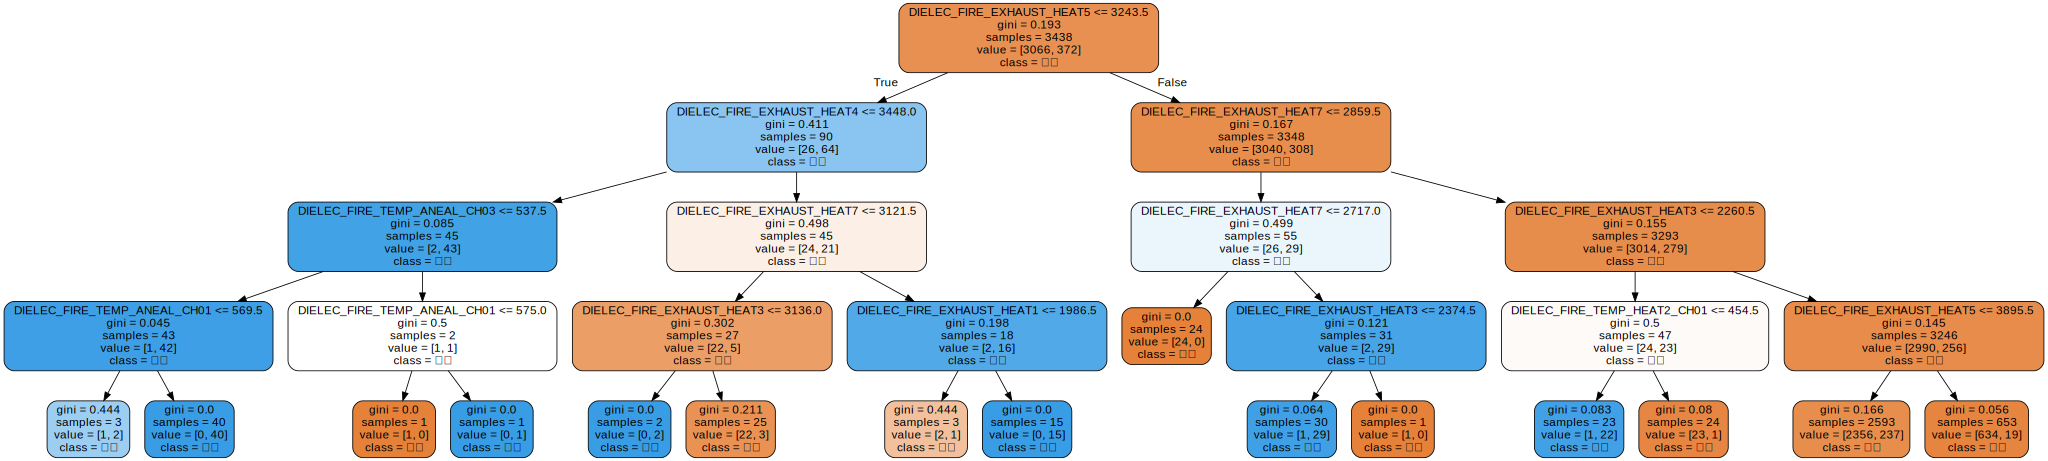

In [ ]:
export_graphviz(tree_final, out_file='di_rf_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('di_rf_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 그레디언트 부스팅 GB

In [ ]:
# 그레디언트 부스팅

from sklearn.ensemble import GradientBoostingClassifier as GBC
v_feature_name = df_raw_x.columns

# 최종 모델
gb_final = GBC(
               random_state=1234,
               n_estimators=50,
               max_depth=4,
               min_samples_split=10,
               min_samples_leaf=10,
               learning_rate=.1
               )
gb_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(gb_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Accuracy on data set : 0.940


,Feature,Importance
16,DIELEC_FIRE_EXHAUST_HEAT5,0.363
18,DIELEC_FIRE_EXHAUST_HEAT7,0.200
14,DIELEC_FIRE_EXHAUST_HEAT3,0.116
15,DIELEC_FIRE_EXHAUST_HEAT4,0.082
3,DIELEC_FIRE_TEMP_HEAT2_CH01,0.042
12,DIELEC_FIRE_EXHAUST_HEAT1,0.040
17,DIELEC_FIRE_EXHAUST_HEAT6,0.033
13,DIELEC_FIRE_EXHAUST_HEAT2,0.031
11,DIELEC_FIRE_TEMP_ANEAL_CH03,0.023
10,DIELEC_FIRE_TEMP_ANEAL_CH02,0.020


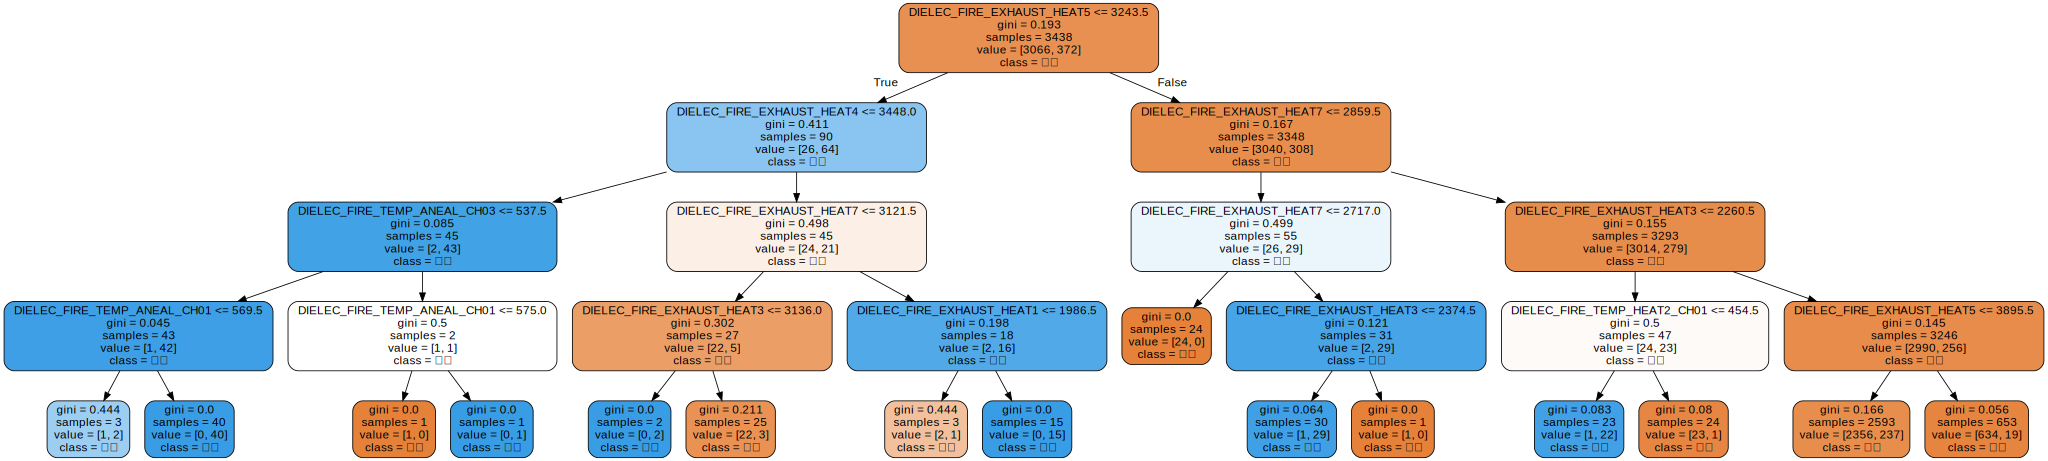

In [ ]:
export_graphviz(tree_final, out_file='di_gb_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('di_gb_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 그래프

In [ ]:
df_list = df_raw.columns.to_list()
df_list

['JUDGE',
 'LOT_ID',
 'PANEL_ID',
 'TAT_1BLACK_1PRINT',
 'TAT_1BLACK_2RTD',
 'TAT_2AG_1PRINT',
 'TAT_2AG_2RTD',
 'TAT_2AG_3EXPOSURE',
 'TAT_3BUS_1DEVELOP',
 'TAT_3BUS_2FIRE',
 'TAT_4DIELEC_FIRE',
 'TAT_5MGO',
 'TAT_6PHOS_1R_1DISPENSER',
 'TAT_6PHOS_1R_2DRY',
 'TAT_6PHOS_2G_1DISPENSER',
 'TAT_6PHOS_2G_2DRY',
 'TAT_6PHOS_3B_1DISPENSER',
 'TAT_6PHOS_4FIRE',
 'TAT_7PASTE',
 'TAT_8AGING',
 'BLACK_RTD_TEMP_GLASS_START',
 'BLACK_RTD_TEMP_GLASS_END',
 'BLACK_RTD_TEMP_WALL_START',
 'BLACK_RTD_TEMP_WALL_MAX',
 'BLACK_RTD_PRES_START',
 'BLACK_RTD_PRES_END',
 'BLACK_RTD_TEMP_GLASS_OUT',
 'BLACK_RTD_TEMP_HOOD_START',
 'BLACK_RTD_TEMP_HOOD_MAX',
 'AG_RTD_TEMP_GLASS_START',
 'AG_RTD_TEMP_GLASS_END',
 'AG_RTD_TEMP_WALL_START',
 'AG_RTD_TEMP_WALL_MAX',
 'AG_RTD_PRES_START',
 'AG_RTD_PRES_END',
 'AG_RTD_TEMP_GLASS_OUT',
 'AG_RTD_TEMP_HOOD_START',
 'AG_RTD_TEMP_HOOD_MAX',
 'AG_EXPOSURE_TEMP_MASK',
 'BUS_DEVELOP_TEMP_OVEN1',
 'BUS_DEVELOP_TEMP_OVEN2',
 'BUS_DEVELOP_TEMP_OVEN3',
 'BUS_DEVELOP_PH_TANK1',
 '

## 불량 계산

전체 3438개

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_merge_null_out.csv', engine='python', encoding='cp949')
df_raw['JUDGE'] = np.where(df_raw['JUDGE'] == '양품', 0, 1)

In [ ]:
total = df_raw.groupby(['JUDGE']).size()
total

JUDGE
명점     372
양품    3066
dtype: int64

In [ ]:
bus = df_raw.groupby(['JUDGE', 'MC_2AG_2RTD'], as_index=False)['PANEL_ID'].agg('count')
bus.pivot('MC_2AG_2RTD', 'JUDGE', 'PANEL_ID')

JUDGE,명점,양품
MC_2AG_2RTD,,
1호기,221,1666
2호기,151,1400


In [ ]:
ag = df_raw.groupby(['JUDGE', 'MC_3BUS_1DEVELOP'], as_index=False)['PANEL_ID'].agg('count')
ag.pivot('MC_3BUS_1DEVELOP', 'JUDGE', 'PANEL_ID')

JUDGE,명점,양품
MC_3BUS_1DEVELOP,,
1호기,200,1508
2호기,172,1558


In [ ]:
ag = df_raw.groupby(['JUDGE', 'MC_4DIELEC_1FIRE'], as_index=False)['PANEL_ID'].agg('count')
ag.pivot('MC_4DIELEC_1FIRE', 'JUDGE', 'PANEL_ID')

JUDGE,명점,양품
MC_4DIELEC_1FIRE,,
1호기,122,1024
2호기,147,966
3호기,103,1076


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='3호기')].shape)

(23, 133)


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['AG_RTD_TEMP_GLASS_OUT']>48.05)&(df_raw['BUS_DEVELOP_TEMP_TANK2']>31.504)&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']<=3243.5)].shape)

(9, 133)


In [ ]:
print(df_raw[(df_raw['AG_RTD_TEMP_GLASS_OUT']>48.05)&(df_raw['BUS_DEVELOP_TEMP_TANK2']>31.504)&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']<=3243.5)].shape)

(9, 133)


In [ ]:
print(df_raw[(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='1호기')].shape)

In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['MC_2AG_2RTD']=='1호기')&(df_raw['AG_RTD_TEMP_GLASS_OUT']>37.75)].shape)

(221, 133)


In [ ]:
print(df_raw[(df_raw['AG_RTD_TEMP_GLASS_OUT']>37.75)&(df_raw['MC_2AG_2RTD']=='1호기')].shape)

(1885, 133)


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['MC_2AG_2RTD']=='1호기')&(df_raw['AG_RTD_TEMP_GLASS_OUT']<=37.75)].shape)

(155, 133)


In [ ]:
print(df_raw[(df_raw['AG_RTD_TEMP_GLASS_OUT']<=48.05)&(df_raw['MC_2AG_2RTD']=='1호기')].shape)

(1821, 133)


In [ ]:
MC_2AG_2RTD
MC_3BUS_1DEVELOP
MC_4DIELEC_1FIRE

In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['MC_4DIELEC_1FIRE']=='1호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')].shape)

(61, 133)


In [ ]:
print(df_raw[(df_raw['MC_4DIELEC_1FIRE']=='1호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')].shape)

(615, 133)


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['BUS_DEVELOP_TEMP_TANK2']>31.504)].shape)

(102, 133)


In [ ]:
print(df_raw[(df_raw['BUS_DEVELOP_TEMP_TANK2']>31.504)].shape)

(108, 133)


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['BUS_DEVELOP_TEMP_TANK2']<=31.504)].shape)

(270, 133)


In [ ]:
print(df_raw[(df_raw['BUS_DEVELOP_TEMP_TANK2']<=31.504)].shape)

(3330, 133)


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']>3243.5)].shape)

(308, 133)


In [ ]:
print(df_raw[(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']>3243.5)].shape)

(3348, 133)


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']<=3243.5)].shape)

(64, 133)


In [ ]:
print(df_raw[(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']<=3243.5)].shape)

(90, 133)


### 설비별

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/MERGE후결측값제거.csv', engine='python', encoding='cp949')
df_raw.head()

,JUDGE,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_PH_TANK1,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_PH_TANK1 2,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_PH_TANK1 3,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES1,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_HEAT1_CH01,BUS_FIRE_TEMP_HEAT1_CH02,BUS_FIRE_TEMP_HEAT1_CH03,BUS_FIRE_TEMP_HEAT2_CH01,BUS_FIRE_TEMP_HEAT2_CH02,BUS_FIRE_TEMP_HEAT2_CH03,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_HEAT1_CH01,DIELEC_FIRE_TEMP_HEAT1_CH02,DIELEC_FIRE_TEMP_HEAT1_CH03,DIELEC_FIRE_TEMP_HEAT2_CH01,DIELEC_FIRE_TEMP_HEAT2_CH02,DIELEC_FIRE_TEMP_HEAT2_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_KEEP_CH02,DIELEC_FIRE_TEMP_KEEP_CH03,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_HEAT_CH01,PHOS_FIRE_TEMP_HEAT_CH02,PHOS_FIRE_TEMP_HEAT_CH03,PHOS_FIRE_TEMP_HEAT_CH04,PHOS_FIRE_TEMP_KEEP_CH01,PHOS_FIRE_TEMP_KEEP_CH02,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4,날짜,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,86,220,83,74,160,416,6900,6447,530,76,333,88,396,86,7140,0,10074,44.3,102.3,88.8,114.8,229.5,156.5,58.9,93.2,96.0,46.0,138.0,76.0,102.0,321.0,434.0,41.3,92.0,93.0,23.660,60.253,61.796,60.541,-0.33,23.496,9.200,30.753,6.548,34.305,0,2.030,2.052,164,190,213,261,287,330,567,583,599,572,538,519,296,342,349,455,453,474,569,573,582,570,552,534,2017,2200,3168,3639,3283,3148,3215,48.0,136.0,110.5,167.8,86.6,70.9,28.3,126.0,157.30,47.2,139.2,111.0,189.4,55.9,28.2,32.4,82.8,84.0,392,404,419,439,482,481,480,475,443,419,392,372,4115,3973,4432,2506,2019-04-01,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,86,210,84,71,150,372,6693,6600,530,80,438,82,381,84,6956,0,10075,44.6,101.6,88.7,114.3,216.9,155.9,59.0,93.9,96.0,46.0,139.0,77.9,101.0,398.8,339.8,45.6,93.0,93.0,23.340,61.528,60.228,63.139,-0.33,23.420,9.200,30.800,6.550,35.300,0,2.032,2.010,164,190,212,261,287,330,569,584,600,574,541,520,296,342,349,454,453,473,573,573,582,575,558,536,2166,2132,2290,3331,3971,3030,2960,47.5,136.0,111.9,167.2,84.5,71.8

In [ ]:
a = df_raw.loc[:, ['날짜', 'MC_2AG_2RTD', 'AG_RTD_TEMP_GLASS_OUT']]
a = a[a['MC_2AG_2RTD'] == '2호기' ]

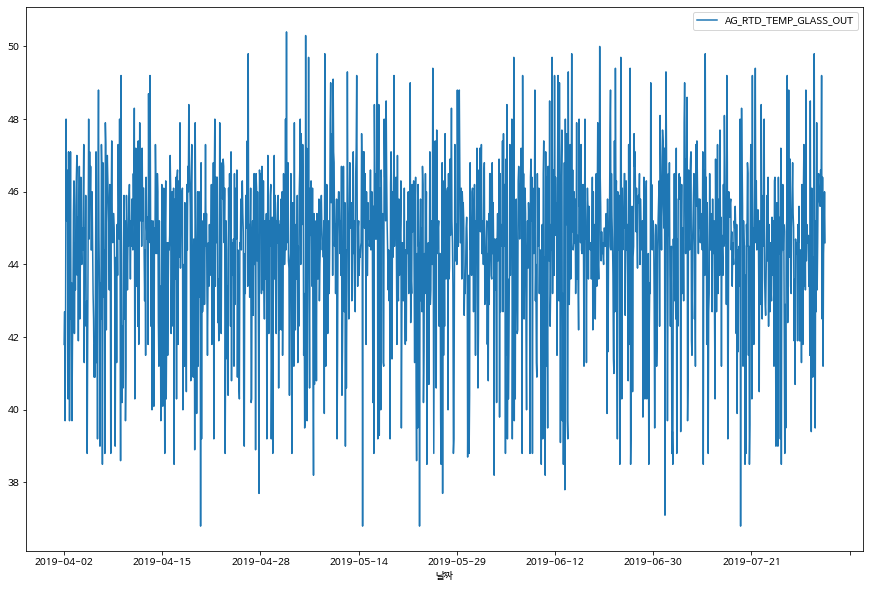

In [ ]:
a = a.set_index('날짜')
a.plot(figsize=(15, 10))

In [ ]:

df_raw = df_raw.set_index('날짜')
df_raw
print(df_raw[(df_raw['AG_RTD_TEMP_GLASS_OUT']<=48.05)&(df_raw['MC_2AG_2RTD']=='1호기')].shape)
# df_raw.plot(figsize=(15, 10))

,DIELEC_FIRE_EXHAUST_HEAT5,MC_4DIELEC_1FIRE
날짜,,
2019-04-01,3283,3호기
2019-04-01,3971,3호기
2019-04-01,3324,3호기
2019-04-01,3306,3호기
2019-04-01,3900,3호기
...,...,...
2019-08-01,3295,3호기
2019-08-01,3580,3호기
2019-08-01,3271,3호기


#### AG RTD

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_df_ratio_machine2.csv', engine='python', encoding='cp949')

df_raw.groupby(['MC_2AG_2RTD'], as_index=False)['JUDGE'].agg('mean')

,MC_2AG_2RTD,불량률
0,1호기,12.75
1,2호기,8.60


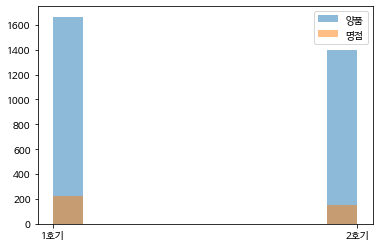

In [ ]:
fun_plot_hist(df_raw, 'MC_2AG_2RTD')

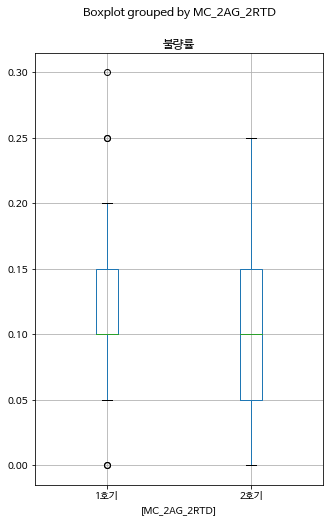

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_df_ratio_machine2.csv', engine='python', encoding='cp949')

a = df_raw[['MC_2AG_2RTD', '불량률']]
a.boxplot(by='MC_2AG_2RTD', figsize=(5, 8))

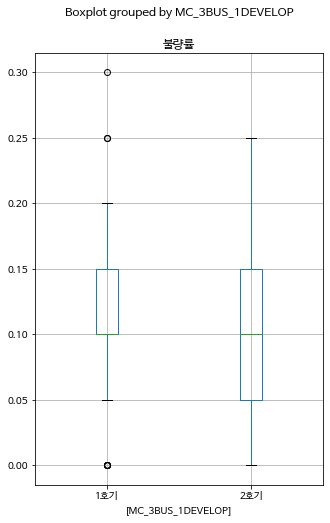

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_df_ratio_machine2.csv', engine='python', encoding='cp949')

a = df_raw[['MC_3BUS_1DEVELOP', '불량률']]
a.boxplot(by='MC_3BUS_1DEVELOP', figsize=(5, 8))

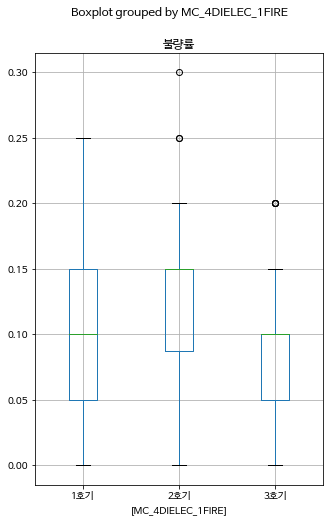

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_df_ratio_machine2.csv', engine='python', encoding='cp949')

a = df_raw[['MC_4DIELEC_1FIRE', '불량률']]
a.boxplot(by='MC_4DIELEC_1FIRE', figsize=(5, 8))

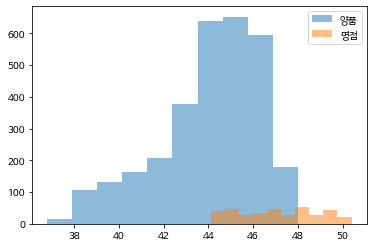

In [ ]:
fun_plot_hist(df_raw, 'AG_RTD_TEMP_GLASS_OUT')

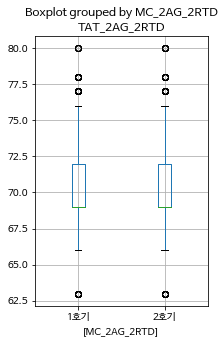

In [ ]:
a = df_raw[['MC_2AG_2RTD', 'TAT_2AG_2RTD']]
a.boxplot(by='MC_2AG_2RTD', figsize=(3, 5))

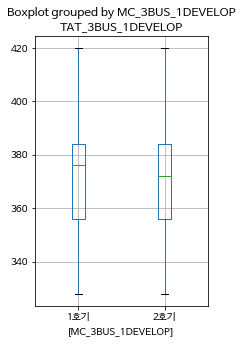

In [ ]:
a = df_raw[['MC_3BUS_1DEVELOP', 'TAT_3BUS_1DEVELOP']]
a.boxplot(by='MC_3BUS_1DEVELOP', figsize=(3, 5))

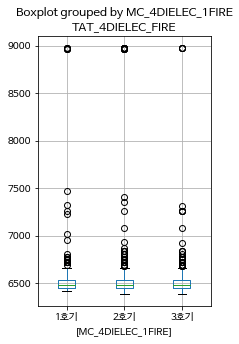

In [ ]:
a = df_raw[['MC_4DIELEC_1FIRE', 'TAT_4DIELEC_FIRE']]
a.boxplot(by='MC_4DIELEC_1FIRE', figsize=(3, 5))

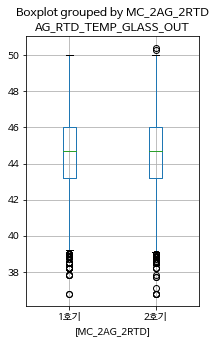

In [ ]:
a = df_raw[['MC_2AG_2RTD', 'AG_RTD_TEMP_GLASS_OUT']]
a.boxplot(by='MC_2AG_2RTD', figsize=(3, 5))

#### BUS 현상

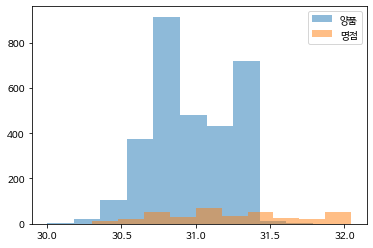

In [ ]:
fun_plot_hist(df_raw, 'BUS_DEVELOP_TEMP_TANK2')

In [ ]:
a = df_raw[['JUDGE', 'MC_3BUS_1DEVELOP']]
b = a.groupby(['MC_3BUS_1DEVELOP'], as_index=False)['JUDGE'].agg('count')
b

,MC_3BUS_1DEVELOP,JUDGE
0,1호기,1708
1,2호기,1730


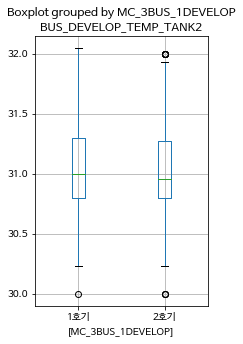

In [ ]:
a = df_raw[['MC_3BUS_1DEVELOP', 'BUS_DEVELOP_TEMP_TANK2']]
a.boxplot(by='MC_3BUS_1DEVELOP', figsize=(3, 5))

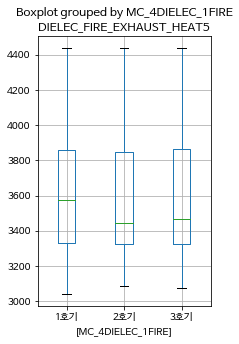

In [ ]:
a = df_raw[['MC_4DIELEC_1FIRE', 'DIELEC_FIRE_EXHAUST_HEAT5']]
a.boxplot(by='MC_4DIELEC_1FIRE', figsize=(3, 5))

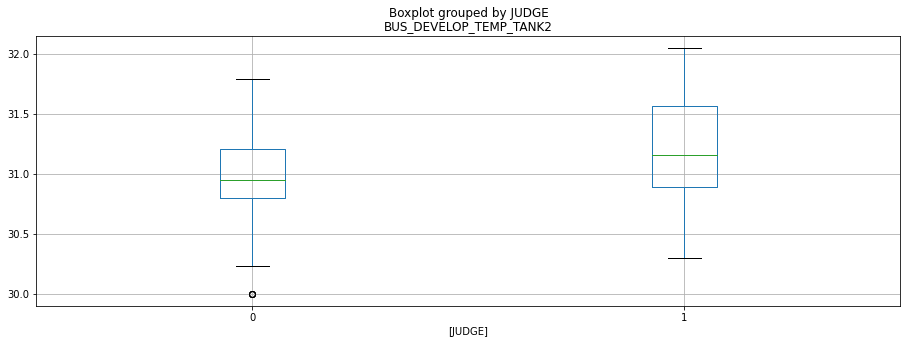

In [ ]:
a = df_raw[['JUDGE', 'BUS_DEVELOP_TEMP_TANK2']]
a.boxplot(by='JUDGE', figsize=(15, 5))

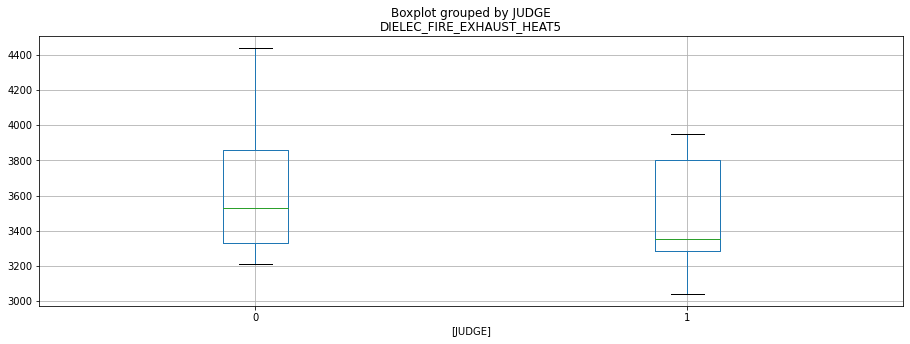

In [ ]:
a = df_raw[['JUDGE', 'DIELEC_FIRE_EXHAUST_HEAT5']]
a.boxplot(by='JUDGE', figsize=(15, 5))

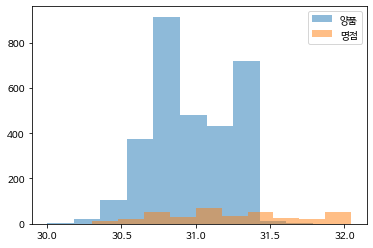

In [ ]:
fun_plot_hist(df_raw, 'BUS_DEVELOP_TEMP_TANK2')

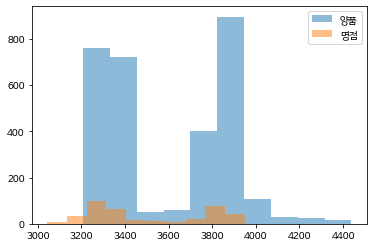

In [ ]:
fun_plot_hist(df_raw, 'DIELEC_FIRE_EXHAUST_HEAT5')

In [ ]:
fit_group = fit.groupby(['GENDER','AGEGROUP'], as_index=False)['WEIGHT'].agg('mean')
fit_group

In [ ]:
fit_group = df_raw.groupby(['MC_4DIELEC_1FIRE'], as_index=False)['JUDGE'].agg('mean')
fit_group.pivot

<bound method DataFrame.pivot of   MC_4DIELEC_1FIRE  JUDGE
0              1호기  0.106
1              2호기  0.132
2              3호기  0.087>

In [ ]:
fit_group = df_raw.groupby(['MC_2AG_2RTD'], as_index=False)['JUDGE'].agg('mean')
fit_group.pivot

<bound method DataFrame.pivot of   MC_2AG_2RTD  JUDGE
0         1호기  0.117
1         2호기  0.097>

In [ ]:
fit_group = df_raw.groupby(['MC_3BUS_1DEVELOP'], as_index=False)['JUDGE'].agg('mean')
fit_group.pivot

<bound method DataFrame.pivot of   MC_3BUS_1DEVELOP  JUDGE
0              1호기  0.117
1              2호기  0.099>

In [ ]:
df_raw.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK_x,TIME_2AG_x,TIME_3BUS_x,TIME_4DIELEC_x,TIME_5MGO_x,TIME_6PHOS_x,TIME_7PASTE_x,TIME_8AGING_x,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING,TIME_1BLACK_y,TIME_2AG_y,TIME_3BUS_y,TIME_4DIELEC_y,TIME_5MGO_y,TIME_6PHOS_y,TIME_7PASTE_y,TIME_8AGING_y,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_PH_TANK1,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_PH_TANK1 2,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_PH_TANK1 3,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES1,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_HEAT1_CH01,BUS_FIRE_TEMP_HEAT1_CH02,BUS_FIRE_TEMP_HEAT1_CH03,BUS_FIRE_TEMP_HEAT2_CH01,BUS_FIRE_TEMP_HEAT2_CH02,BUS_FIRE_TEMP_HEAT2_CH03,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_HEAT1_CH01,DIELEC_FIRE_TEMP_HEAT1_CH02,DIELEC_FIRE_TEMP_HEAT1_CH03,DIELEC_FIRE_TEMP_HEAT2_CH01,DIELEC_FIRE_TEMP_HEAT2_CH02,DIELEC_FIRE_TEMP_HEAT2_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_KEEP_CH02,DIELEC_FIRE_TEMP_KEEP_CH03,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_HEAT_CH01,PHOS_FIRE_TEMP_HEAT_CH02,PHOS_FIRE_TEMP_HEAT_CH03,PHOS_FIRE_TEMP_HEAT_CH04,PHOS_FIRE_TEMP_KEEP_CH01,PHOS_FIRE_TEMP_KEEP_CH02,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,0,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,2019-04-11 12:41,2019-04-11 14:21,86,220.0,83.0,74,160.0,416.0,6900.0,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,2019-04-11 12:41,2019-04-11 14:21,44.3,102.3,88.8,114.8,229.5,156.5,58.9,93.2,96.0,46.0,138.0,76.0,102.0,321.0,434.0,41.3,92.0,93.0,23.660,60.253,61.796,60.541,-0.33,23.496,9.200,30.753,6.548,34.305,0.0,2.030,2.052,164.0,190.0,213.0,261.0,287.0,330.0,567.0,583.0,599.0,572.0,538.0,519.0,296.0,342.0,349.0,455.0,453.0,474.0,569.0,573.0,582.0,570.0,552.0,534.0,2017.0,2200.0,3168.0,3639.0,3283.0,3148.0,3215.0,48.0,136.0,110.5,1

In [ ]:
df_raw['MC_2AG_2RTD'] = np.where(df_raw['MC_2AG_2RTD'] == '1호기', 1, 2)

In [ ]:
df_raw.query('AG_RTD_TEMP_GLASS_OUT > 48.05 & JUDGE == 1 & MC_2AG_2RTD == 1')['JUDGE'].sum() / df_raw.query('AG_RTD_TEMP_GLASS_OUT > 48.05 & MC_2AG_2RTD == 1')['JUDGE'].count()

1.0

In [ ]:
df_raw[(df_raw['AG_RTD_TEMP_GLASS_OUT']>48.05)&(df_raw['JUDGE']==1)&(df_raw['MC_2AG_2RTD']=='1호기')].shape

(66, 157)

In [ ]:
df_raw[(df_raw['AG_RTD_TEMP_GLASS_OUT']>48.05) & df_raw['DIELEC_FIRE_EXHAUST_HEAT5']>3243) & df_raw['BUS_DEVELOP_TEMP_TANK2']>31.5)&(df_raw['JUDGE']==1)].shape

SyntaxError: ignored

In [ ]:
fit_group.pivot(index='AGEGROUP', columns='GENDER', values='WEIGHT')

In [ ]:
round(df_raw[(df_raw['MC_4DIELEC_1FIRE']=='1호기')&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']>=3243)&(df_raw['BUS_DEVELOP_TEMP_TANK2']>=3243)]['JUDGE'].mean(),3)

0.094

In [ ]:
round(df_raw[(df_raw['MC_4DIELEC_1FIRE']=='1호기')&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']<=3243)]['JUDGE'].mean(),3)

0.708

#### 공정 설비

ag

In [ ]:
#df_raw['MC_2AG_2RTD'] = np.where(df_raw['MC_2AG_2RTD'] == '1호기', 1, 2)
df_raw_x = df_raw[['AG_RTD_TEMP_GLASS_OUT']]
df_raw_y = df_raw['MC_2AG_2RTD']
df_raw_x.tail()

,AG_RTD_TEMP_GLASS_OUT
3433,45.8
3434,46.3
3435,39.2
3436,46.7
3437,38.8


In [ ]:
df_raw_y

0       1호기
1       1호기
2       1호기
3       1호기
4       1호기
       ... 
3433    1호기
3434    1호기
3435    1호기
3436    1호기
3437    1호기
Name: MC_2AG_2RTD, Length: 3438, dtype: object

#### ANOVA

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_list = df_raw_x.columns.to_list()

#for i in df_list :
model = ols('AG_RTD_TEMP_GLASS_OUT ~ C(MC_2AG_2RTD)', df_raw).fit()
print(anova_lm(model))
print()

                    df     sum_sq  mean_sq     F  PR(>F)
C(MC_2AG_2RTD)     1.0      1.033    1.033  0.18   0.672
Residual        3436.0  19729.483    5.742   NaN     NaN



#### 의사결정나무 DT

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = df_raw_x.columns

# 최종 모델
tree_final = DTC(
                 max_depth=1
                )
tree_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.550


,Feature,Importance
0,AG_RTD_TEMP_GLASS_OUT,1.0


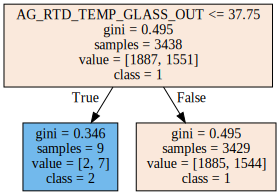

In [ ]:
export_graphviz(tree_final, out_file='tree_final.dot', class_names=['1호기', '2호기'],
                feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

bus

In [ ]:
#df_raw['MC_2AG_2RTD'] = np.where(df_raw['MC_2AG_2RTD'] == '1호기', 1, 2)
df_raw_x = df_raw[['BUS_DEVELOP_TEMP_TANK2']]
df_raw_y = df_raw['MC_3BUS_1DEVELOP']
df_raw_x.tail()

,BUS_DEVELOP_TEMP_TANK2
3433,31.400
3434,30.800
3435,31.400
3436,31.349
3437,30.805


In [ ]:
df_raw_y

0       1호기
1       1호기
2       1호기
3       1호기
4       1호기
       ... 
3433    2호기
3434    2호기
3435    2호기
3436    2호기
3437    2호기
Name: MC_3BUS_1DEVELOP, Length: 3438, dtype: object

#### ANOVA

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_list = df_raw_x.columns.to_list()

#for i in df_list :
model = ols('BUS_DEVELOP_TEMP_TANK2 ~ C(MC_3BUS_1DEVELOP)', df_raw).fit()
print(anova_lm(model))
print()

                         df   sum_sq  mean_sq      F  PR(>F)
C(MC_3BUS_1DEVELOP)     1.0    0.302    0.302  3.003   0.083
Residual             3436.0  344.964    0.100    NaN     NaN



#### 의사결정나무 DT

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = df_raw_x.columns

# 최종 모델
tree_final = DTC(
                 max_depth=1
                )
tree_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.508


,Feature,Importance
0,BUS_DEVELOP_TEMP_TANK2,1.0


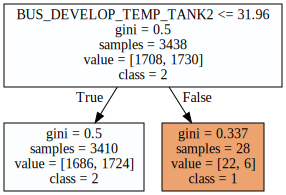

In [ ]:
export_graphviz(tree_final, out_file='tree_final.dot', class_names=['1호기', '2호기'],
                feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

유전체

In [ ]:
#df_raw['MC_2AG_2RTD'] = np.where(df_raw['MC_2AG_2RTD'] == '1호기', 1, 2)
df_raw_x = df_raw[['DIELEC_FIRE_EXHAUST_HEAT5']]
df_raw_y = df_raw['MC_4DIELEC_1FIRE']
df_raw_x.tail()

,DIELEC_FIRE_EXHAUST_HEAT5
3433,3295
3434,3580
3435,3271
3436,3220
3437,3790


In [ ]:
df_raw_y

0       3호기
1       3호기
2       3호기
3       3호기
4       3호기
       ... 
3433    3호기
3434    3호기
3435    3호기
3436    3호기
3437    3호기
Name: MC_4DIELEC_1FIRE, Length: 3438, dtype: object

#### ANOVA

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_list = df_raw_x.columns.to_list()

#for i in df_list :
model = ols('DIELEC_FIRE_EXHAUST_HEAT5 ~ C(MC_4DIELEC_1FIRE)', df_raw).fit()
print(anova_lm(model))
print()

                         df     sum_sq    mean_sq      F  PR(>F)
C(MC_4DIELEC_1FIRE)     2.0  5.843e+04  29216.611  0.351   0.704
Residual             3435.0  2.856e+08  83154.920    NaN     NaN



#### 의사결정나무 DT

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = df_raw_x.columns

# 최종 모델
tree_final = DTC(
                 max_depth=2
                )
tree_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.351


,Feature,Importance
0,DIELEC_FIRE_EXHAUST_HEAT5,1.0


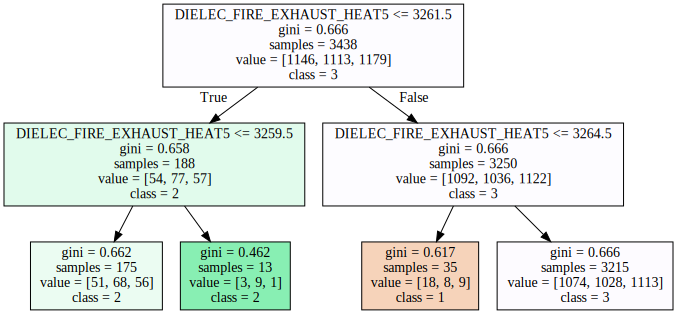

In [ ]:
export_graphviz(tree_final, out_file='tree_final.dot', class_names=['1호기', '2호기', '3호기'],
                feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
df_raw.tail()

,JUDGE,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_PH_TANK1,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_PH_TANK2,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_PH_TANK3,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES1,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_HEAT1_CH01,BUS_FIRE_TEMP_HEAT1_CH02,BUS_FIRE_TEMP_HEAT1_CH03,BUS_FIRE_TEMP_HEAT2_CH01,BUS_FIRE_TEMP_HEAT2_CH02,BUS_FIRE_TEMP_HEAT2_CH03,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_HEAT1_CH01,DIELEC_FIRE_TEMP_HEAT1_CH02,DIELEC_FIRE_TEMP_HEAT1_CH03,DIELEC_FIRE_TEMP_HEAT2_CH01,DIELEC_FIRE_TEMP_HEAT2_CH02,DIELEC_FIRE_TEMP_HEAT2_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_KEEP_CH02,DIELEC_FIRE_TEMP_KEEP_CH03,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_HEAT_CH01,PHOS_FIRE_TEMP_HEAT_CH02,PHOS_FIRE_TEMP_HEAT_CH03,PHOS_FIRE_TEMP_HEAT_CH04,PHOS_FIRE_TEMP_KEEP_CH01,PHOS_FIRE_TEMP_KEEP_CH02,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
3433,0,LOT-300,PNL-13,88,210,84,69,160,384,6867,6480,530,80,369,80,396,86,7140,0,9749,44.8,108.6,88.6,115.4,192.0,156.9,59.4,94.0,95.6,47.0,138.0,78.9,102.0,354.3,347.0,45.8,92.0,92.9,23.456,60.757,60.105,60.605,-0.33,23.500,9.200,31.400,6.550,34.900,0,2.022,2.002,163,190,212,261,287,330,575,586,602,576,543,520,296,343,349,455,453,473,569,572,581,575,554,533,2007,2216,3171,3542,3295,3207,3238,47.4,136.0,110.7,166.5,87.6,74.8,28.4,156.0,156.8,48.5,141.4,114.4,191.7,63.0,31.8,34.7,83.4,84.3,393,405,420,441,480,480,480,475,443,421,392,372,3642,4065,4446,2585,2호기,1호기,1호기,1호기,1호기,2호기,1호기,3호기,2호기,2호기,1호기,2호기,1호기,1호기,3호기,1호기,2호기
3434,0,LOT-300,PNL-14,86,220,87,69,142,356,6720,6540,530,78,393,100,399,100,6930,0,10077,44.0,114.6,88.2,113.5,215.3,150.0,58.4,94.0,96.2,46.2,138.0,78.8,101.2,320.2,413.4,46.3,94.0,94.0,23.600,60.730,62.971,62.098,-0.33,23.453,9.200,30.800,6.550,35.300,0,2.036,1.998,168,190,212,261,288,331,574,585,602,570,542,519,296,343,350,454,453,473,569,573,582,573,552,532,2028,2206,3251,3423,3580,3210,3160,47.2,136.0,111.1,167.7,87.3,70.7,28.2,130.0,15

In [ ]:
df_raw_y

0       0
1       0
2       0
3       0
4       0
       ..
3433    0
3434    0
3435    0
3436    1
3437    0
Name: JUDGE, Length: 3438, dtype: int64

In [ ]:
df_raw_x = df_raw[['AG_RTD_TEMP_GLASS_OUT','BUS_DEVELOP_TEMP_TANK2','DIELEC_FIRE_EXHAUST_HEAT5']]

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = df_raw_x.columns

# 최종 모델
tree_final = DTC(
                 max_depth=4
                )
tree_final.fit(df_raw_x, df_raw_y)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(df_raw_x, df_raw_y)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.951


,Feature,Importance
0,AG_RTD_TEMP_GLASS_OUT,0.661
1,BUS_DEVELOP_TEMP_TANK2,0.274
2,DIELEC_FIRE_EXHAUST_HEAT5,0.064


Text(0, 0.5, '변수')

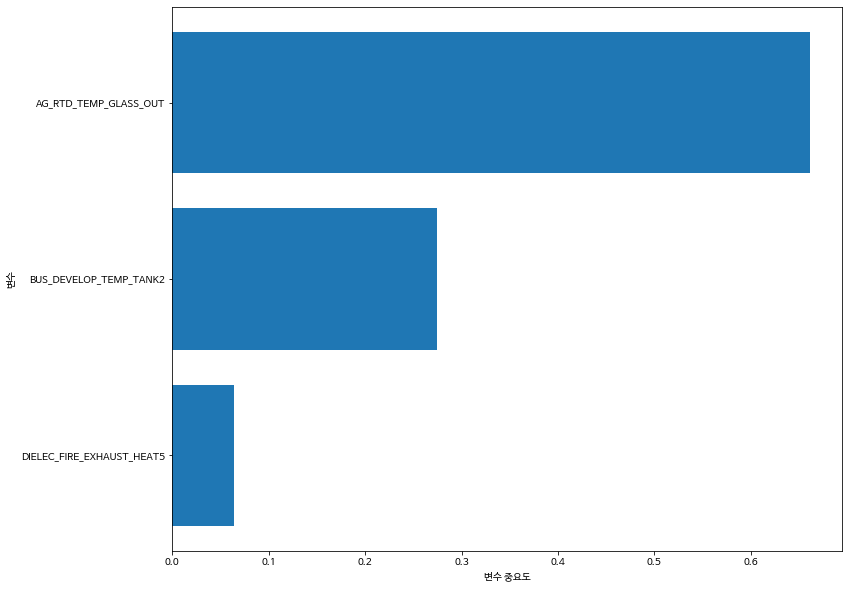

In [ ]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize=(12, 10))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

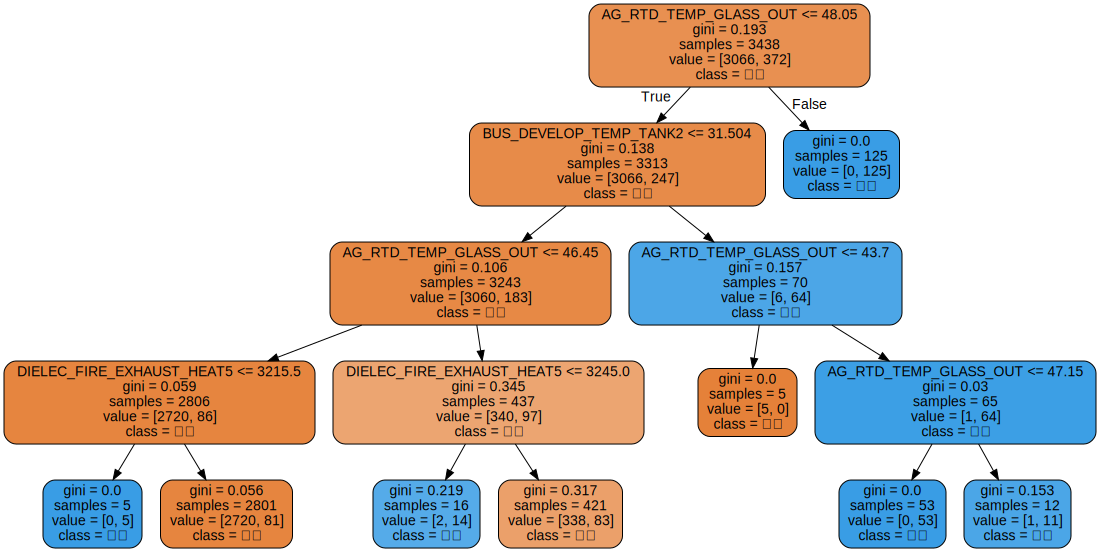

In [ ]:
export_graphviz(tree_final, out_file='di_tree_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('di_tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
 'BLACK_RTD_TEMP_GLASS_START',
 'BLACK_RTD_TEMP_GLASS_END',
 'BLACK_RTD_TEMP_WALL_START',
 'BLACK_RTD_TEMP_WALL_MAX',
 'BLACK_RTD_PRES_START',
 'BLACK_RTD_PRES_END',
 'BLACK_RTD_TEMP_GLASS_OUT',
 'BLACK_RTD_TEMP_HOOD_START',
 'BLACK_RTD_TEMP_HOOD_MAX',
 'AG_RTD_TEMP_GLASS_START',
 'AG_RTD_TEMP_GLASS_END',
 'AG_RTD_TEMP_WALL_START',
 'AG_RTD_TEMP_WALL_MAX',
 'AG_RTD_PRES_START',
 'AG_RTD_PRES_END',
 'AG_RTD_TEMP_GLASS_OUT',
 'AG_RTD_TEMP_HOOD_START',
 'AG_RTD_TEMP_HOOD_MAX',
 'AG_EXPOSURE_TEMP_MASK',
 'BUS_DEVELOP_TEMP_OVEN1',
 'BUS_DEVELOP_TEMP_OVEN2',
 'BUS_DEVELOP_TEMP_OVEN3',
 'BUS_DEVELOP_PH_TANK1',
 'BUS_DEVELOP_TEMP_TANK1',
 'BUS_DEVELOP_PH_TANK2',
 'BUS_DEVELOP_TEMP_TANK2',
 'BUS_DEVELOP_PH_TANK3',
 'BUS_DEVELOP_TEMP_TANK3',
 'BUS_DEVELOP_PRES1',
 'BUS_DEVELOP_PRES2',
 'BUS_DEVELOP_PRES3',
 'BUS_FIRE_TEMP_HEAT1_CH01',
 'BUS_FIRE_TEMP_HEAT1_CH02',
 'BUS_FIRE_TEMP_HEAT1_CH03',
 'BUS_FIRE_TEMP_HEAT2_CH01',
 'BUS_FIRE_TEMP_HEAT2_CH02',
 'BUS_FIRE_TEMP_HEAT2_CH03',
 'BUS_FIRE_TEMP_KEEP_CH01',
 'BUS_FIRE_TEMP_KEEP_CH02',
 'BUS_FIRE_TEMP_KEEP_CH03',
 'BUS_FIRE_TEMP_ANEAL_CH01',
 'BUS_FIRE_TEMP_ANEAL_CH02',
 'BUS_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_TEMP_HEAT1_CH01',
 'DIELEC_FIRE_TEMP_HEAT1_CH02',
 'DIELEC_FIRE_TEMP_HEAT1_CH03',
 'DIELEC_FIRE_TEMP_HEAT2_CH01',
 'DIELEC_FIRE_TEMP_HEAT2_CH02',
 'DIELEC_FIRE_TEMP_HEAT2_CH03',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_KEEP_CH02',
 'DIELEC_FIRE_TEMP_KEEP_CH03',
 'DIELEC_FIRE_TEMP_ANEAL_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH02',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT3',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7',
 'PHOS_R_DRY_TEMP_GLASS_START',
 'PHOS_R_DRY_TEMP_GLASS_END',
 'PHOS_R_DRY_TEMP_WALL_START',
 'PHOS_R_DRY_TEMP_WALL_MAX',
 'PHOS_R_DRY_PRES_START',
 'PHOS_R_DRY_PRES_END',
 'PHOS_R_DRY_TEMP_GLASS_OUT',
 'PHOS_R_DRY_TEMP_HOOD_START',
 'PHOS_R_DRY_TEMP_HOOD_MAX',
 'PHOS_G_DRY_TEMP_GLASS_START',
 'PHOS_G_DRY_TEMP_GLASS_END',
 'PHOS_G_DRY_TEMP_WALL_START',
 'PHOS_G_DRY_TEMP_WALL_MAX',
 'PHOS_G_DRY_PRES_START',
 'PHOS_G_DRY_PRES_END',
 'PHOS_G_DRY_TEMP_GLASS_OUT',
 'PHOS_G_DRY_TEMP_HOOD_START',
 'PHOS_G_DRY_TEMP_HOOD_MAX',
 'PHOS_FIRE_TEMP_HEAT_CH01',
 'PHOS_FIRE_TEMP_HEAT_CH02',
 'PHOS_FIRE_TEMP_HEAT_CH03',
 'PHOS_FIRE_TEMP_HEAT_CH04',
 'PHOS_FIRE_TEMP_KEEP_CH01',
 'PHOS_FIRE_TEMP_KEEP_CH02',
 'PHOS_FIRE_TEMP_KEEP_CH03',
 'PHOS_FIRE_TEMP_KEEP_CH04',
 'PHOS_FIRE_TEMP_ANEAL_CH01',
 'PHOS_FIRE_TEMP_ANEAL_CH02',
 'PHOS_FIRE_TEMP_ANEAL_CH03',
 'PHOS_FIRE_TEMP_ANEAL_CH04',
 'PHOS_FIRE_EXHAUST_HEAT1',
 'PHOS_FIRE_EXHAUST_HEAT2',
 'PHOS_FIRE_EXHAUST_HEAT3',
 'PHOS_FIRE_EXHAUST_HEAT4',
 'MC_1BLACK_1PRINT',
 'MC_1BLACK_2RTD',
 'MC_2AG_1PRINT',
 'MC_2AG_2RTD',
 'MC_2AG_3EXPOSURE',
 'MC_3BUS_1DEVELOP',
 'MC_3BUS_2FIRE',
 'MC_4DIELEC_1FIRE',
 'MC_5MGO',
 'MC_6PHOS_1R_1DISPENSER',
 'MC_6PHOS_1R_2DRY',
 'MC_6PHOS_2G_1DISPENSER',
 'MC_6PHOS_2G_2DRY',
 'MC_6PHOS_3B_1DISPENSER',
 'MC_6PHOS_4FIRE',
 'MC_7PASTE',
 'MC_8AGING']

In [ ]:
df_raw_x = df_raw[['AG_RTD_TEMP_GLASS_OUT','BUS_DEVELOP_TEMP_TANK2','DIELEC_FIRE_EXHAUST_HEAT5']]

### 1호기

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_merge_null_out.csv', engine='python', encoding='cp949')
df_raw['JUDGE'] = np.where(df_raw['JUDGE'] == '양품', 0, 1)

In [ ]:
a = df_raw.loc[:, ['JUDGE', 'MC_4DIELEC_1FIRE', 'DIELEC_FIRE_EXHAUST_HEAT5']]
b = a[a['MC_4DIELEC_1FIRE'] == '1호기']
c = b[['DIELEC_FIRE_EXHAUST_HEAT5']]
d = b[['JUDGE']]

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = c.columns

# 최종 모델
tree_final = DTC(
                 max_depth=4
                )
tree_final.fit(c, d)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(c, d)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.906


,Feature,Importance
0,DIELEC_FIRE_EXHAUST_HEAT5,1.0


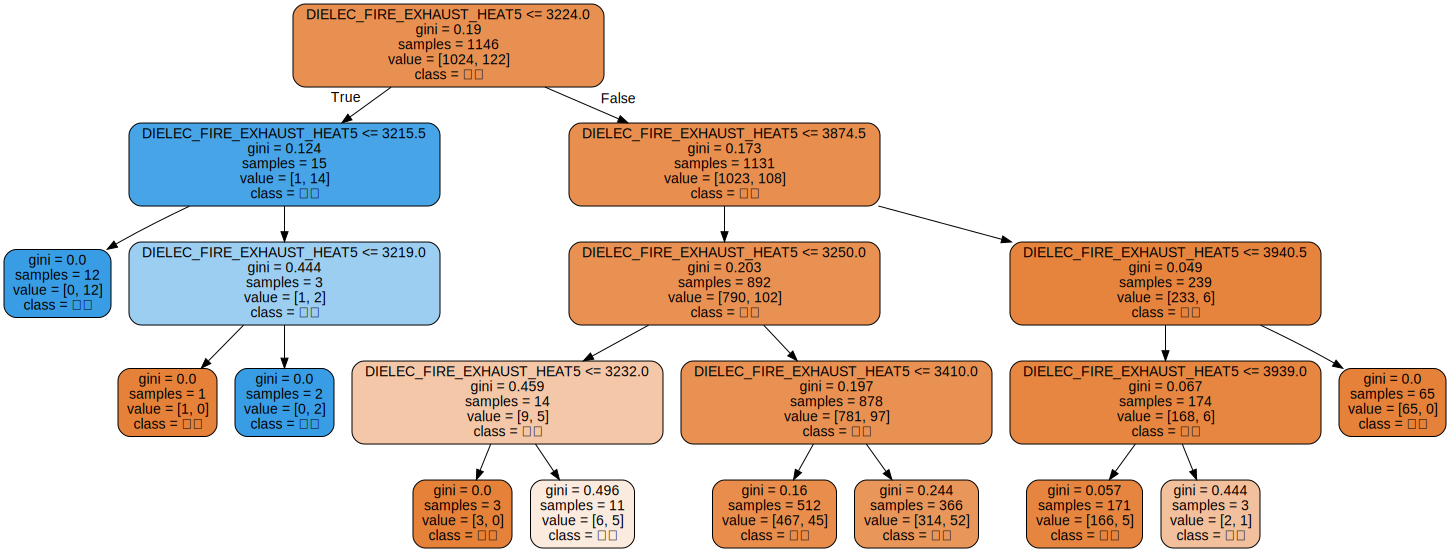

In [ ]:
export_graphviz(tree_final, out_file='di_tree_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('di_tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

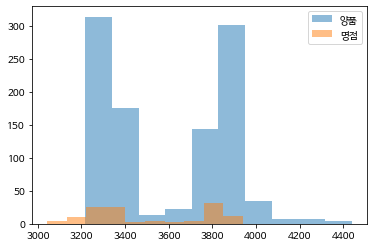

In [ ]:
fun_plot_hist(b, 'DIELEC_FIRE_EXHAUST_HEAT5')

#### 2호기

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_merge_null_out.csv', engine='python', encoding='cp949')
df_raw['JUDGE'] = np.where(df_raw['JUDGE'] == '양품', 0, 1)

In [ ]:
a = df_raw.loc[:, ['JUDGE', 'MC_4DIELEC_1FIRE', 'DIELEC_FIRE_EXHAUST_HEAT5']]
b = a[a['MC_4DIELEC_1FIRE'] == '2호기']
c = b[['DIELEC_FIRE_EXHAUST_HEAT5']]
d = b[['JUDGE']]

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = c.columns

# 최종 모델
tree_final = DTC(
                 max_depth=4
                )
tree_final.fit(c, d)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(c, d)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.888


,Feature,Importance
0,DIELEC_FIRE_EXHAUST_HEAT5,1.0


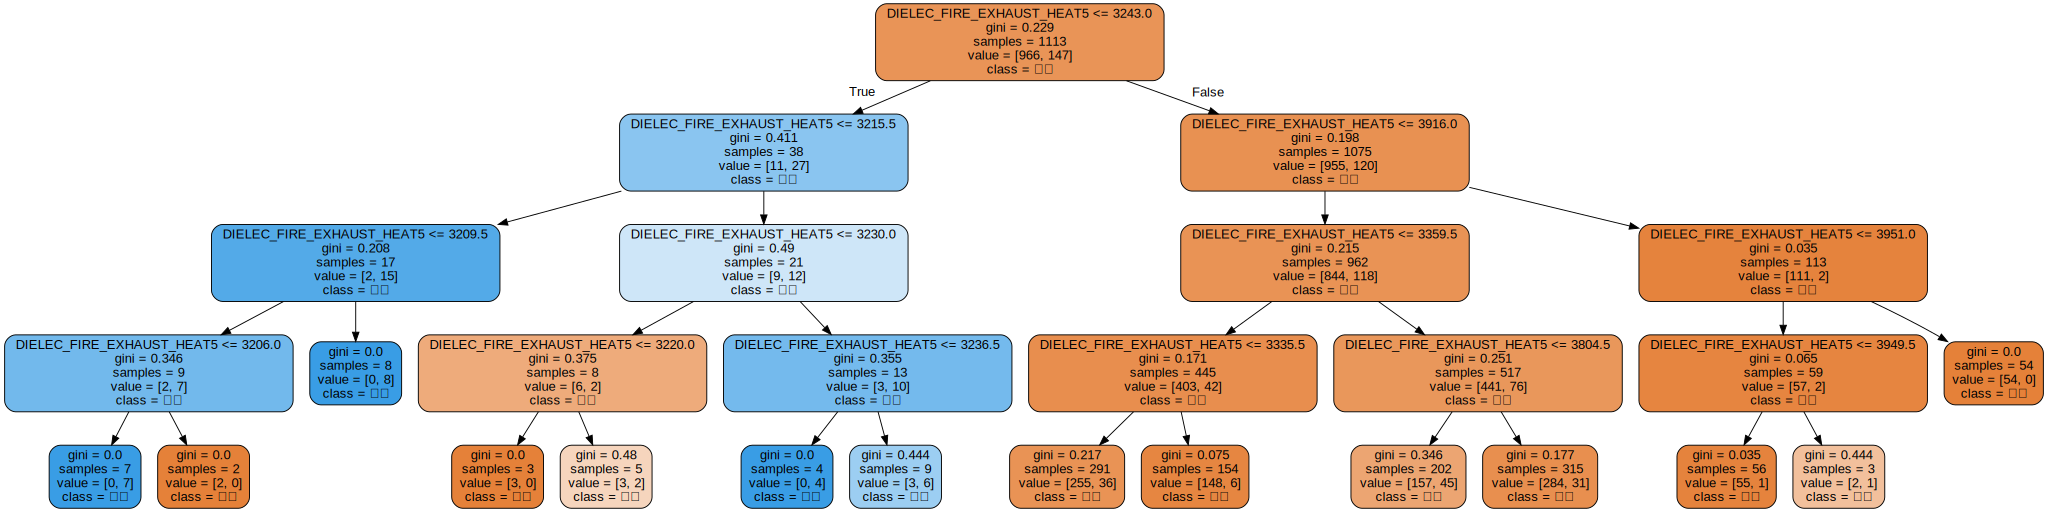

In [ ]:
export_graphviz(tree_final, out_file='di_tree_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('di_tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

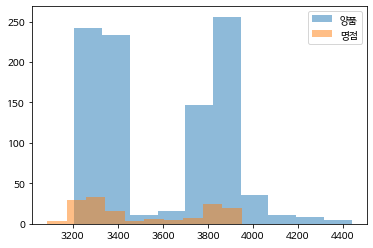

In [ ]:
fun_plot_hist(b, 'DIELEC_FIRE_EXHAUST_HEAT5')

#### 3호기

In [ ]:
# 데이터 불러오기
df_raw = pd.read_csv('/content/gdrive/My Drive/AI/bigdata/mfg_merge_null_out.csv', engine='python', encoding='cp949')
df_raw['JUDGE'] = np.where(df_raw['JUDGE'] == '양품', 0, 1)

In [ ]:
a = df_raw.loc[:, ['JUDGE', 'MC_4DIELEC_1FIRE', 'DIELEC_FIRE_EXHAUST_HEAT5']]
b = a[a['MC_4DIELEC_1FIRE'] == '3호기']
c = b[['DIELEC_FIRE_EXHAUST_HEAT5']]
d = b[['JUDGE']]

In [ ]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier as DTC
v_feature_name = c.columns

# 최종 모델
tree_final = DTC(
                 max_depth=4
                )
tree_final.fit(c, d)

# 데이터 정확도
print('Accuracy on data set : {:.3f}'.format(tree_final.score(c, d)))

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.head(10).round(3)

Accuracy on data set : 0.925


,Feature,Importance
0,DIELEC_FIRE_EXHAUST_HEAT5,1.0


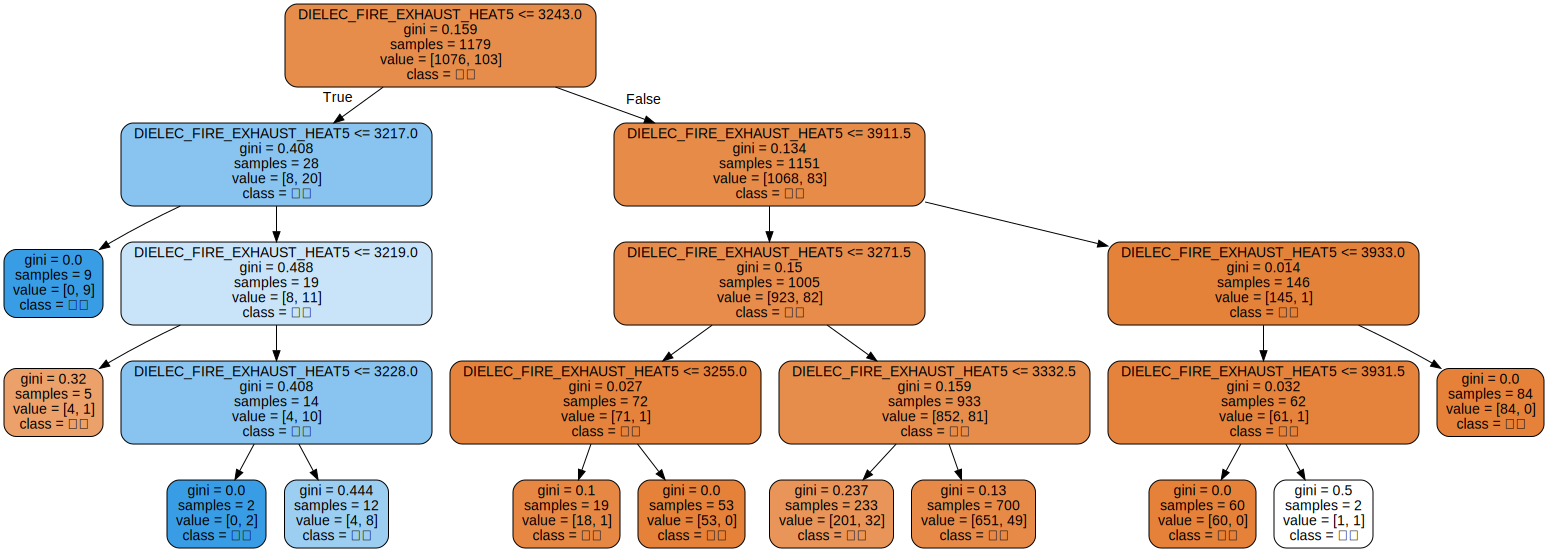

In [ ]:
export_graphviz(tree_final, out_file='di_tree_final.dot', class_names=['양품', '명점'],
                feature_names=v_feature_name, impurity=True, filled=True, rounded=True)
with open('di_tree_final.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

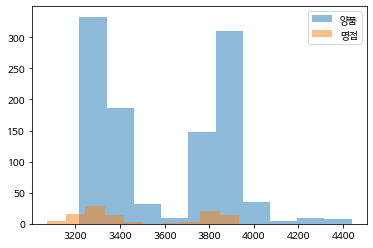

In [ ]:
fun_plot_hist(b, 'DIELEC_FIRE_EXHAUST_HEAT5')

In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='1호기')&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']>3400)].shape)

(10, 133)


In [ ]:
print(df_raw[(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='1호기')&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']>3400)].shape)

(150, 133)


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='1호기')&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']<=3400)].shape)

(15, 133)


In [ ]:
print(df_raw[(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='1호기')&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']<=3500)].shape)

(136, 133)


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='2호기')&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']>3800)].shape)

(12, 133)


In [ ]:
print(df_raw[(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='2호기')&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']>3800)].shape)

(101, 133)


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='2호기')&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']<=3900)].shape)

(28, 133)


In [ ]:
print(df_raw[(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='2호기')&(df_raw['DIELEC_FIRE_EXHAUST_HEAT5']<=3900)].shape)

(220, 133)


In [ ]:
print(df_raw[(df_raw['JUDGE']==1)&(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='3호기')].shape)

(15, 133)


In [ ]:
print(df_raw[(df_raw['MC_2AG_2RTD']=='2호기')&(df_raw['MC_3BUS_1DEVELOP']=='2호기')&(df_raw['MC_4DIELEC_1FIRE']=='3호기')].shape)

(319, 133)
